# 4. Research Questions & Analysis Plan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_somalia_budget.csv')

In [3]:
df.columns

Index(['year', 'month', 'fiscal_date', 'transaction_type',
       'government_department', 'economic_category', 'funding_source',
       'payer_or_recipient', 'gfs_classification_level_2',
       'gfs_classification_level_3', 'gfs_classification_level_4',
       'planned_budget', 'final_budget', 'actual_expenditure_or_revenue',
       'unique_id'],
      dtype='object')

### **A. Descriptive Analysis (What Happened?)**
1. What are the overall trends in government revenue and expenditure from 2013 to 2024?
2. How do revenue streams differ by government_department and economic_category?
3. What is the seasonal pattern of fiscal transactions (monthly/quarterly)?
4. How does actual_expenditure compare with planned_budget and final_budget over time?
5. What are the patterns in funding_source distribution across departments?
6. Which payer_or_recipient categories show the highest volume of transactions?
7. How do economic indicators (e.g., gdp_growth, inflation_rate) change over the dataset period?
8. What is the distribution of transactions by transaction_type (Revenue vs. Expense)?
9. How does the foreign_aid_percent_gdp trend correlate with fiscal performance?
10. Which periods exhibit significant deviations in expected financial outcomes?

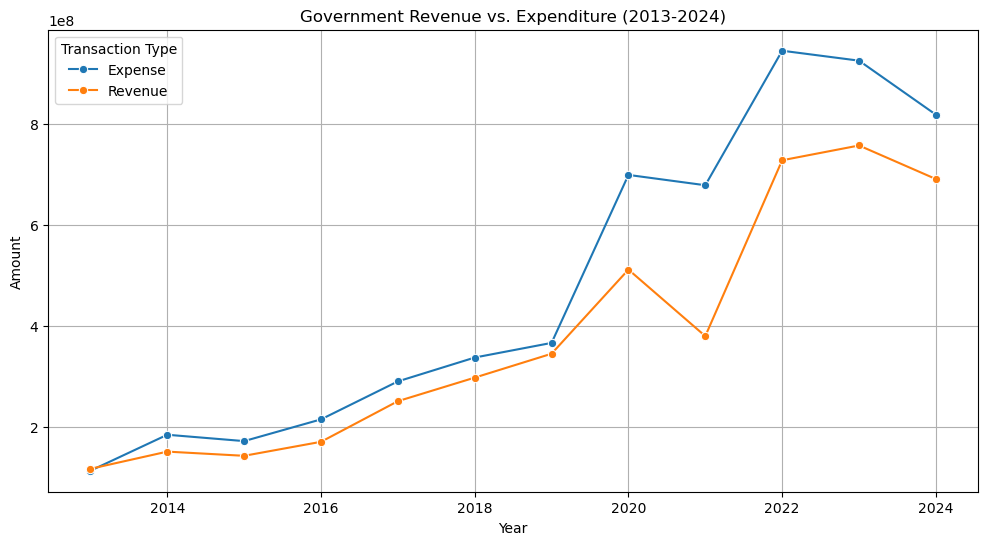

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue and expenditure by year
df['year'] = df['year'].astype(int)
trend_df = df.groupby(['year', 'transaction_type'])['actual_expenditure_or_revenue'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_df, x='year', y='actual_expenditure_or_revenue', hue='transaction_type', marker='o')
plt.title("Government Revenue vs. Expenditure (2013-2024)")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend(title="Transaction Type")
plt.grid(True)
plt.show()

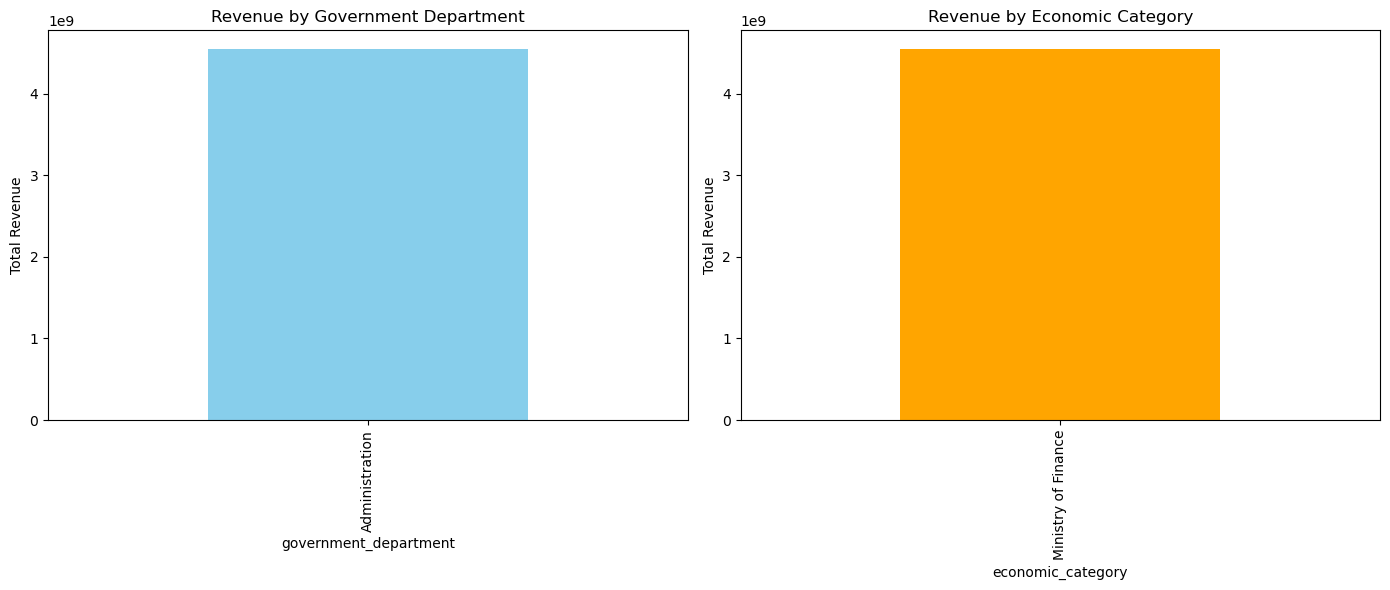

In [97]:
# Revenue by department
rev_dept = df[df['transaction_type'] == 'Revenue'].groupby('government_department')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False).head(10)

# Revenue by economic category
rev_category = df[df['transaction_type'] == 'Revenue'].groupby('economic_category')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

rev_dept.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Revenue by Government Department")
axes[0].set_ylabel("Total Revenue")
axes[0].set_xticklabels(rev_dept.index, rotation=90)

rev_category.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title("Revenue by Economic Category")
axes[1].set_ylabel("Total Revenue")
axes[1].set_xticklabels(rev_category.index, rotation=90)

plt.tight_layout()
plt.show()

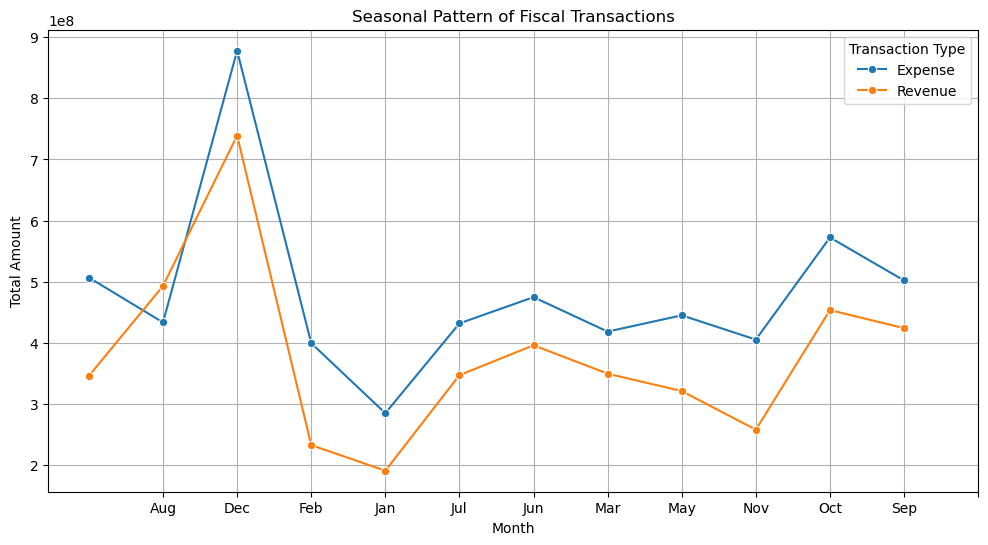

In [7]:
# Aggregate by month
df['month'] = df['month']
seasonal_df = df.groupby(['month', 'transaction_type'])['actual_expenditure_or_revenue'].sum().reset_index()

# Plot seasonal patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_df, x='month', y='actual_expenditure_or_revenue', hue='transaction_type', marker='o')
plt.xticks(range(1, 13))
plt.title("Seasonal Pattern of Fiscal Transactions")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.legend(title="Transaction Type")
plt.grid(True)
plt.show()

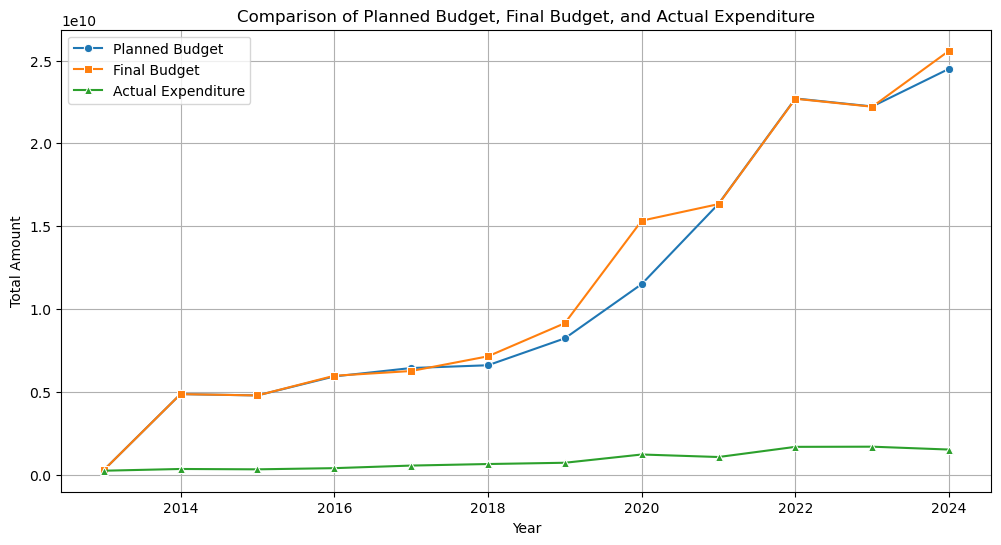

In [8]:
# Aggregate budgets and expenditure by year
budget_comparison = df.groupby('year')[['planned_budget', 'final_budget', 'actual_expenditure_or_revenue']].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_comparison, x='year', y='planned_budget', label="Planned Budget", marker='o')
sns.lineplot(data=budget_comparison, x='year', y='final_budget', label="Final Budget", marker='s')
sns.lineplot(data=budget_comparison, x='year', y='actual_expenditure_or_revenue', label="Actual Expenditure", marker='^')

plt.title("Comparison of Planned Budget, Final Budget, and Actual Expenditure")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.legend()
plt.grid(True)
plt.show()

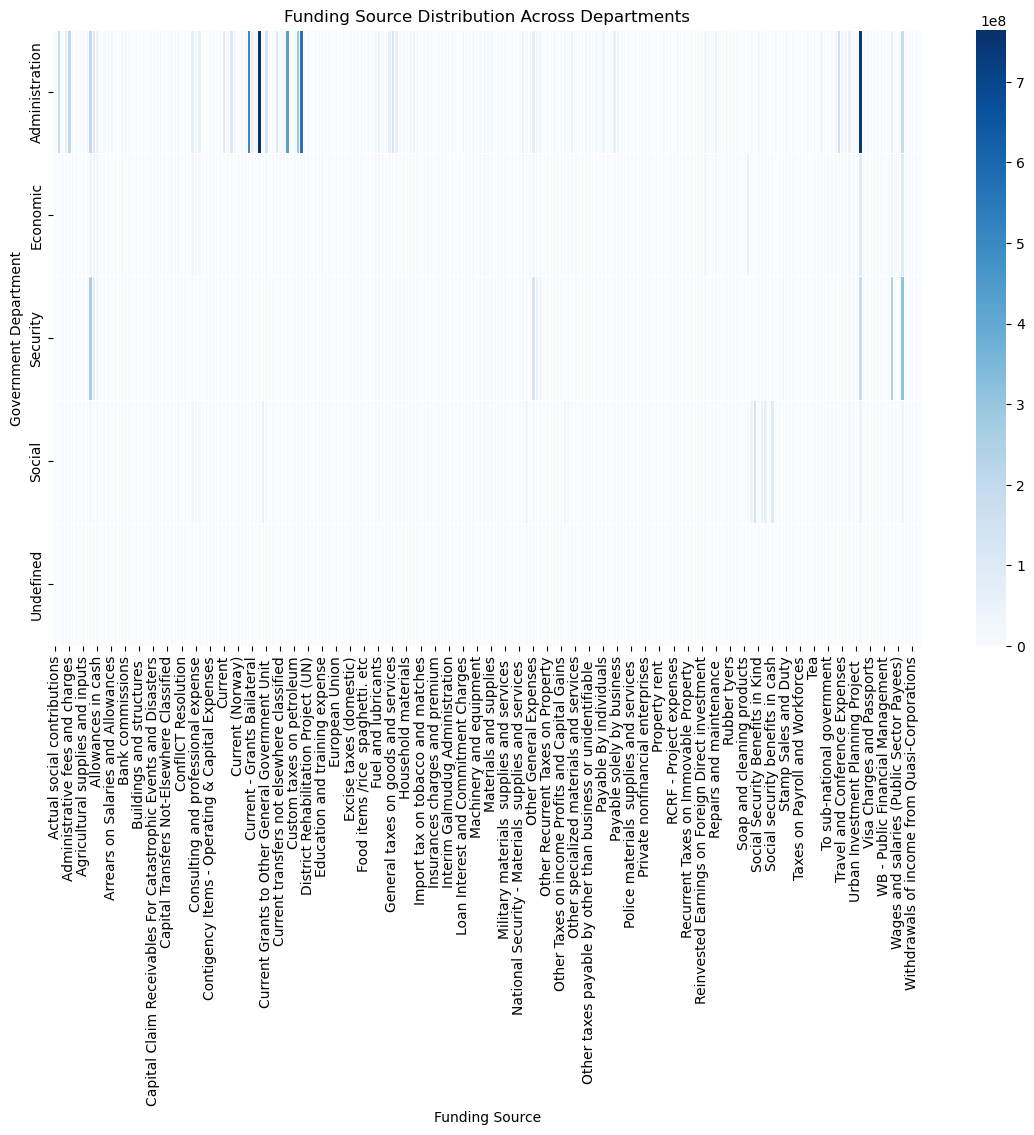

In [9]:
# Aggregate by funding source and department
funding_dist = df.groupby(['government_department', 'funding_source'])['actual_expenditure_or_revenue'].sum().unstack().fillna(0)

# Visualization
plt.figure(figsize=(14, 8))
sns.heatmap(funding_dist, cmap='Blues', linewidths=0.5)
plt.title("Funding Source Distribution Across Departments")
plt.ylabel("Government Department")
plt.xlabel("Funding Source")
plt.xticks(rotation=90)
plt.show()

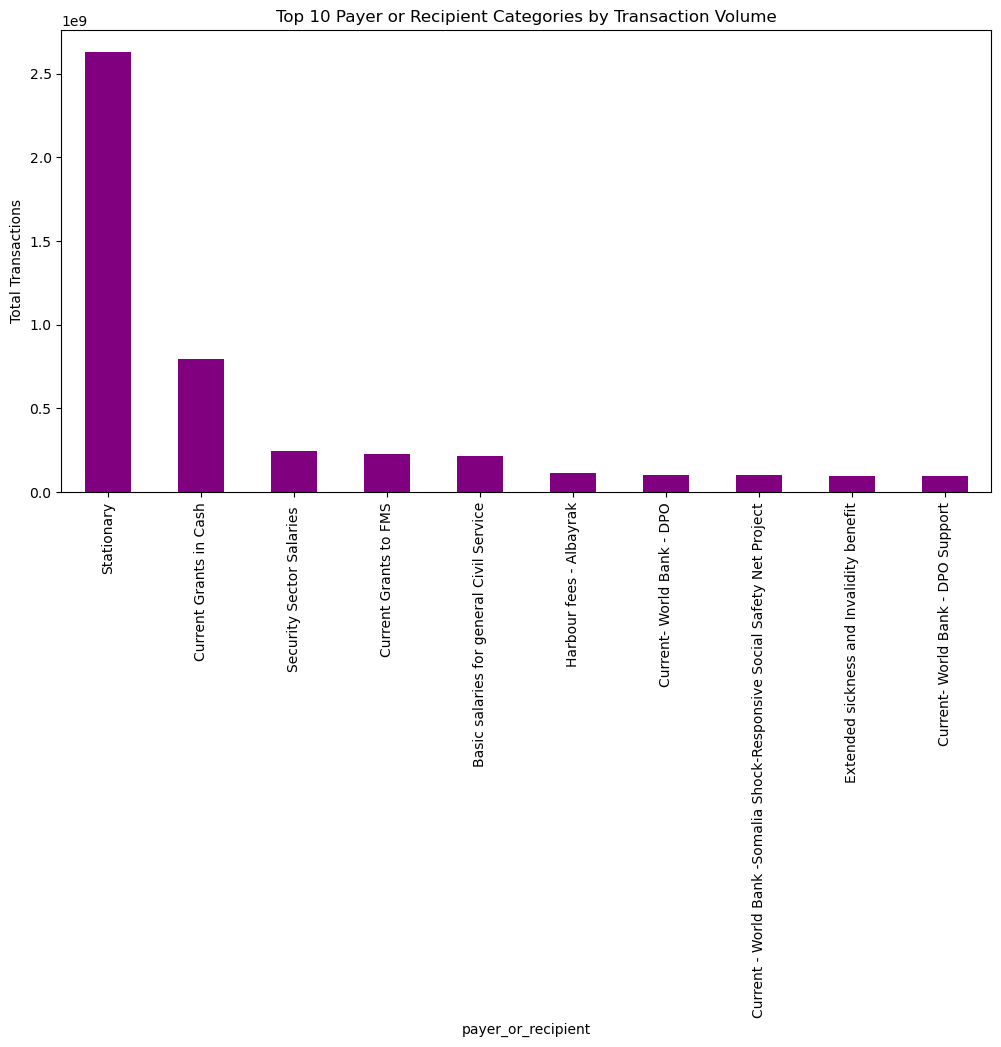

In [24]:
# Aggregate by payer or recipient
top_payers = df.groupby('payer_or_recipient')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
top_payers.plot(kind='bar', color='purple')
plt.title("Top 10 Payer or Recipient Categories by Transaction Volume")
plt.ylabel("Total Transactions")
plt.xticks(rotation=90)
plt.show()

In [14]:
# # Ensure 'gdp_growth' and 'inflation_rate' exist in your dataset
# if 'gdp_growth' in df.columns and 'inflation_rate' in df.columns:
#     econ_trends = df.groupby('year')[['gdp_growth', 'inflation_rate']].mean().reset_index()

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=econ_trends, x='year', y='gdp_growth', label="GDP Growth (%)", marker='o')
# sns.lineplot(data=econ_trends, x='year', y='inflation_rate', label="Inflation Rate (%)", marker='s')

# plt.title("GDP Growth and Inflation Rate Over Time")
# plt.xlabel("Year")
# plt.ylabel("Percentage")
# plt.legend()
# plt.grid(True)
# plt.show()

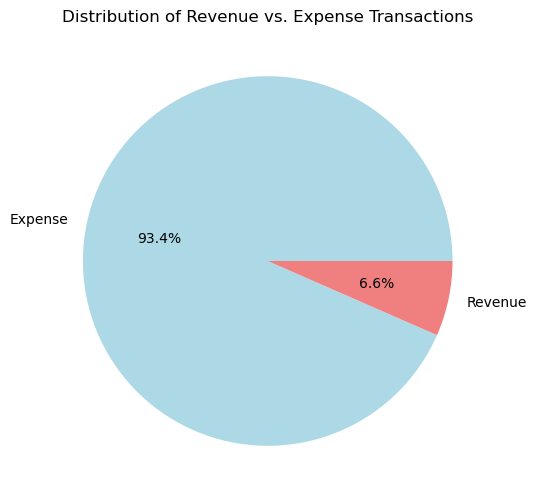

In [15]:
# Count transactions by type
transaction_dist = df['transaction_type'].value_counts()

# Visualization
plt.figure(figsize=(8, 6))
transaction_dist.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Revenue vs. Expense Transactions")
plt.ylabel("")
plt.show()

In [17]:
# # Ensure 'foreign_aid_percent_gdp' exists
# if 'foreign_aid_percent_gdp' in df.columns:
#     aid_trend = df.groupby('year')[['foreign_aid_percent_gdp', 'actual_expenditure_or_revenue']].mean().reset_index()

#     fig, ax1 = plt.subplots(figsize=(12, 6))
    
#     ax2 = ax1.twinx()
#     ax1.plot(aid_trend['year'], aid_trend['foreign_aid_percent_gdp'], 'g-', marker='o', label="Foreign Aid (% GDP)")
#     ax2.plot(aid_trend['year'], aid_trend['actual_expenditure_or_revenue'], 'b-', marker='s', label="Fiscal Performance")

#     ax1.set_xlabel("Year")
#     ax1.set_ylabel("Foreign Aid (% of GDP)", color='g')
#     ax2.set_ylabel("Fiscal Performance (Total Revenue/Expenditure)", color='b')
    
#     ax1.legend(loc="upper left")
#     ax2.legend(loc="upper right")
    
#     plt.title("Foreign Aid vs. Fiscal Performance")
#     plt.grid(True)
#     plt.show()

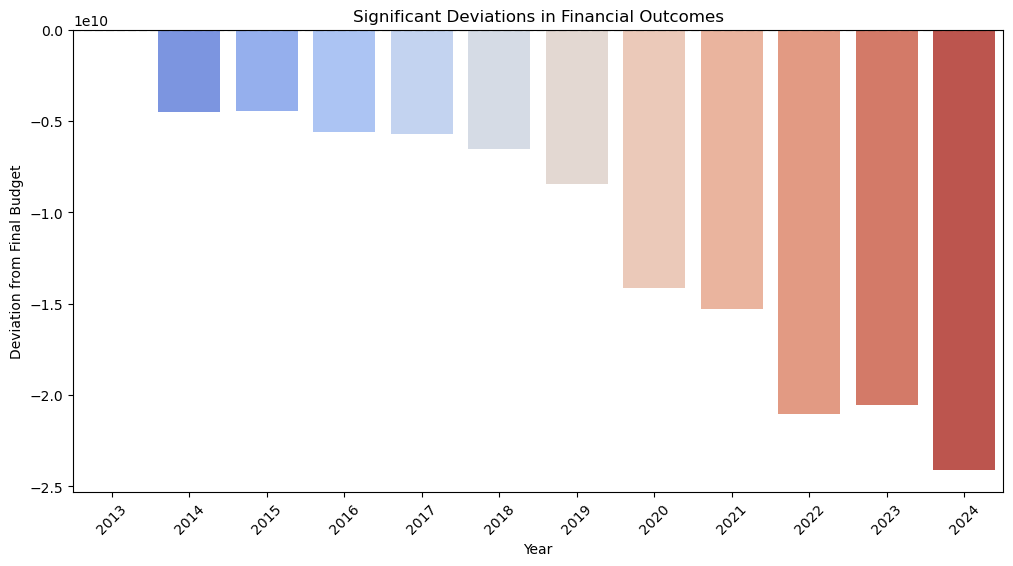

In [18]:
# Calculate deviation from final budget
df['deviation'] = df['actual_expenditure_or_revenue'] - df['final_budget']

# Identify years with highest deviations
deviation_trends = df.groupby('year')['deviation'].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=deviation_trends, x='year', y='deviation', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title("Significant Deviations in Financial Outcomes")
plt.xlabel("Year")
plt.ylabel("Deviation from Final Budget")
plt.xticks(rotation=45)
plt.show()

### **B. Diagnostic Analysis (Why Did It Happen?)**
1. What correlations exist between cost overruns and specific government_departments?
2. How do discrepancies between planned_budget and actual_expenditure explain inefficiencies?
3. Are there significant anomalies in the classification of economic_category and funding_source?
4. What role does gfs_classification_level (2, 3, 4) play in financial inconsistencies?
5. Which external economic variables (e.g., inflation_rate, unemployment_rate) drive fiscal deficits?
6. How do data inconsistencies vary by transaction_type?
7. What are the root causes of deviations in final_budget versus actual_expenditure?
8. How do discrepancies in revenue collection impact overall fiscal sustainability?
9. What operational inefficiencies are evident from outlier analysis?
10. How does foreign aid correlate with revenue shortfalls?

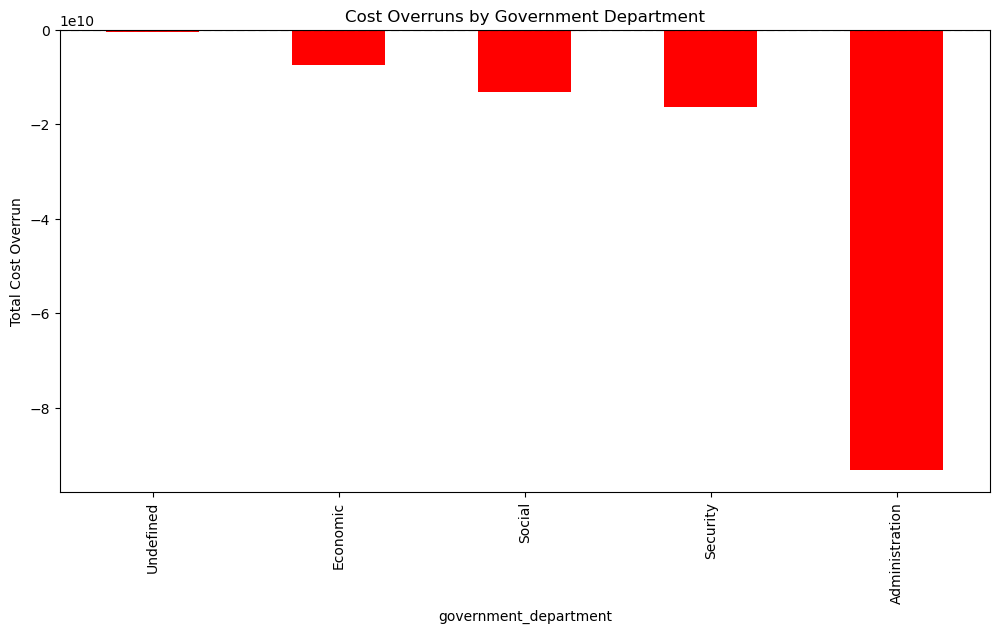

In [19]:
# Calculate cost overrun (Actual Expenditure - Final Budget)
df['cost_overrun'] = df['actual_expenditure_or_revenue'] - df['final_budget']

# Aggregate by department
overrun_by_dept = df.groupby('government_department')['cost_overrun'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
overrun_by_dept.plot(kind='bar', color='red')
plt.title("Cost Overruns by Government Department")
plt.ylabel("Total Cost Overrun")
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.show()

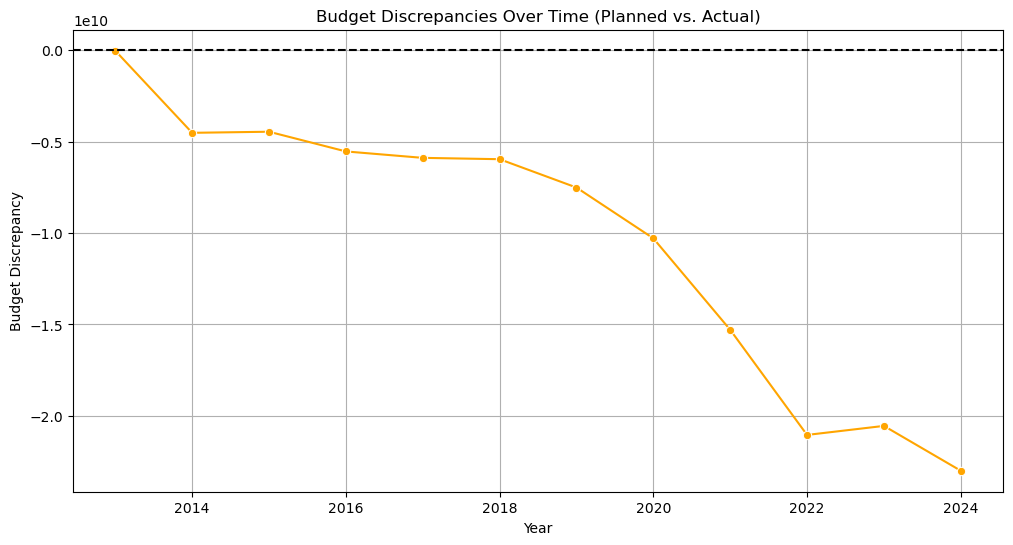

In [20]:
# Calculate budget discrepancy (Actual - Planned)
df['budget_discrepancy'] = df['actual_expenditure_or_revenue'] - df['planned_budget']

# Aggregate by year
budget_discrepancy_trend = df.groupby('year')['budget_discrepancy'].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_discrepancy_trend, x='year', y='budget_discrepancy', marker='o', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Budget Discrepancies Over Time (Planned vs. Actual)")
plt.xlabel("Year")
plt.ylabel("Budget Discrepancy")
plt.grid(True)
plt.show()

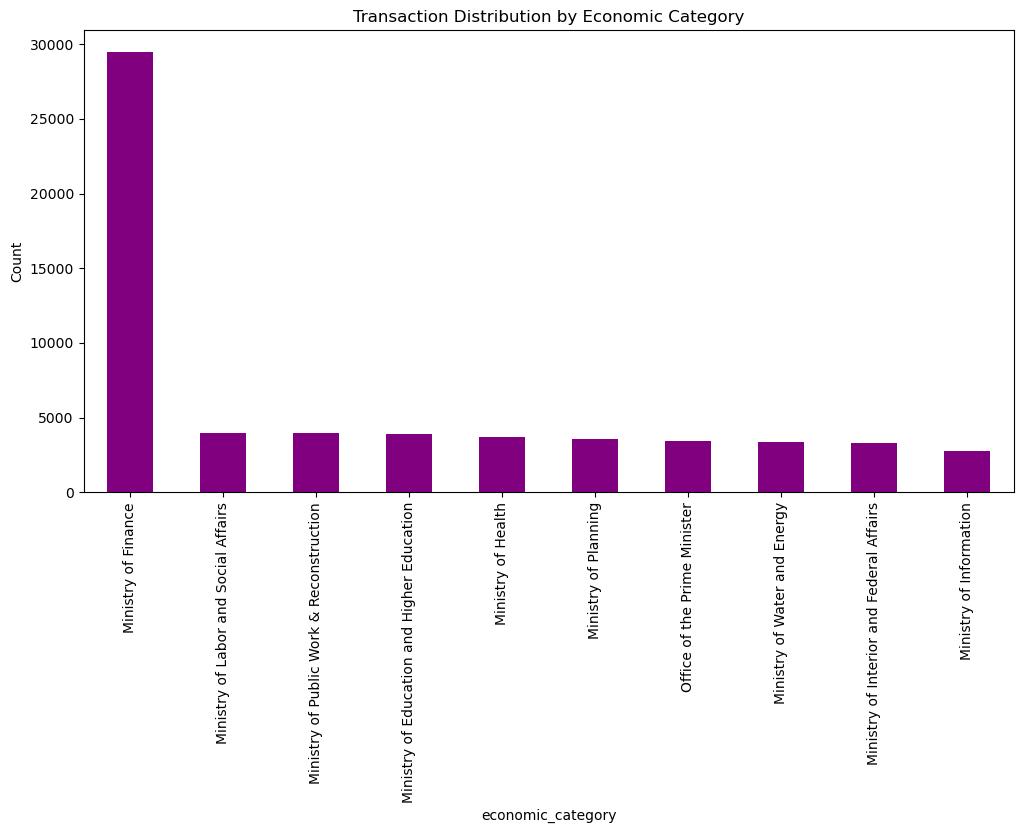

In [22]:
# Check distribution of transactions by economic category
category_counts = df['economic_category'].value_counts()
category_counts = category_counts.head(10)
# Visualization
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='purple')
plt.title("Transaction Distribution by Economic Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

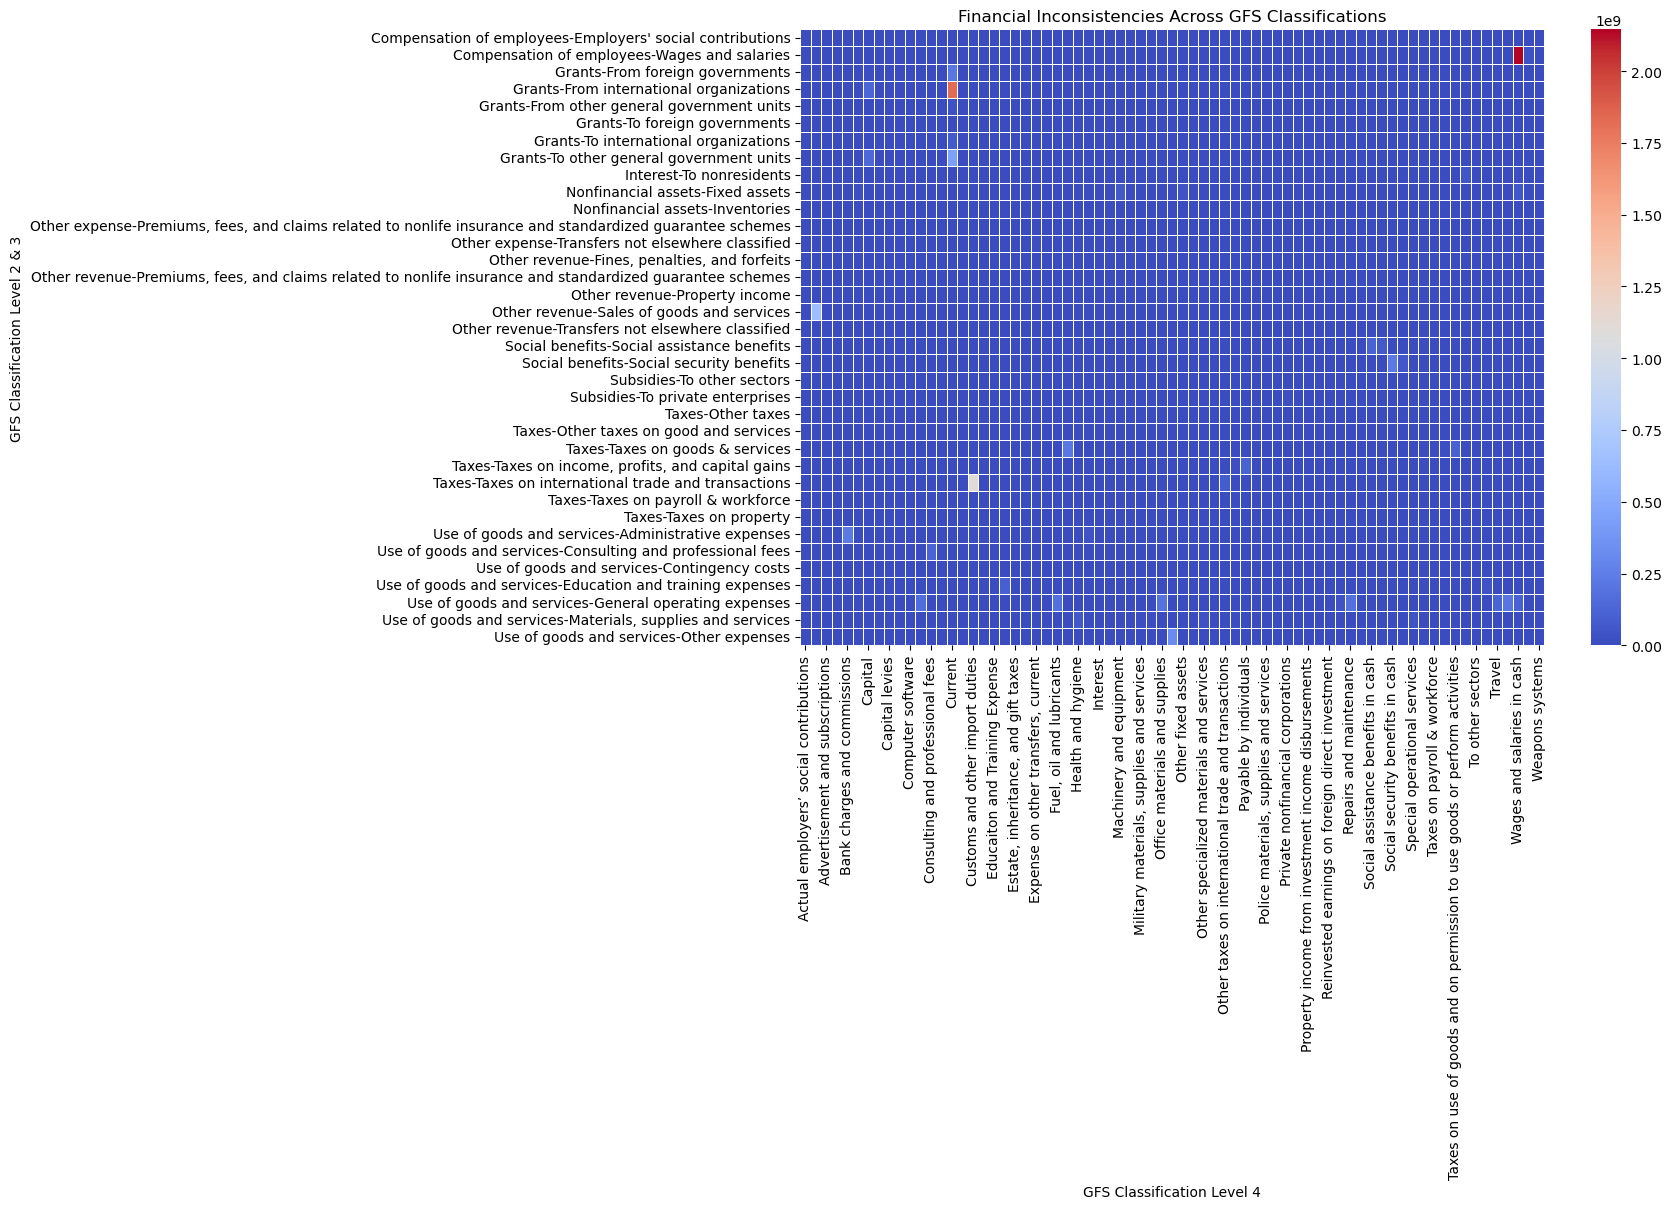

In [23]:
# Aggregate by GFS classification levels
gfs_inconsistencies = df.groupby(['gfs_classification_level_2', 'gfs_classification_level_3', 'gfs_classification_level_4'])['actual_expenditure_or_revenue'].sum().unstack().fillna(0)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(gfs_inconsistencies, cmap='coolwarm', linewidths=0.5)
plt.title("Financial Inconsistencies Across GFS Classifications")
plt.xlabel("GFS Classification Level 4")
plt.ylabel("GFS Classification Level 2 & 3")
plt.xticks(rotation=90)
plt.show()

In [26]:
# # Ensure economic indicators exist
# if 'inflation_rate' in df.columns and 'unemployment_rate' in df.columns:
#     econ_fiscal = df.groupby('year')[['inflation_rate', 'unemployment_rate', 'actual_expenditure_or_revenue']].mean().reset_index()

#     fig, ax1 = plt.subplots(figsize=(12, 6))
    
#     ax2 = ax1.twinx()
#     ax1.plot(econ_fiscal['year'], econ_fiscal['inflation_rate'], 'g-', marker='o', label="Inflation Rate")
#     ax1.plot(econ_fiscal['year'], econ_fiscal['unemployment_rate'], 'r-', marker='s', label="Unemployment Rate")
#     ax2.plot(econ_fiscal['year'], econ_fiscal['actual_expenditure_or_revenue'], 'b-', marker='^', label="Expenditure")

#     ax1.set_xlabel("Year")
#     ax1.set_ylabel("Economic Indicators (%)", color='black')
#     ax2.set_ylabel("Total Expenditure", color='b')
    
#     ax1.legend(loc="upper left")
#     ax2.legend(loc="upper right")
    
#     plt.title("Impact of Economic Variables on Fiscal Deficits")
#     plt.grid(True)
#     plt.show()

<Figure size 1000x600 with 0 Axes>

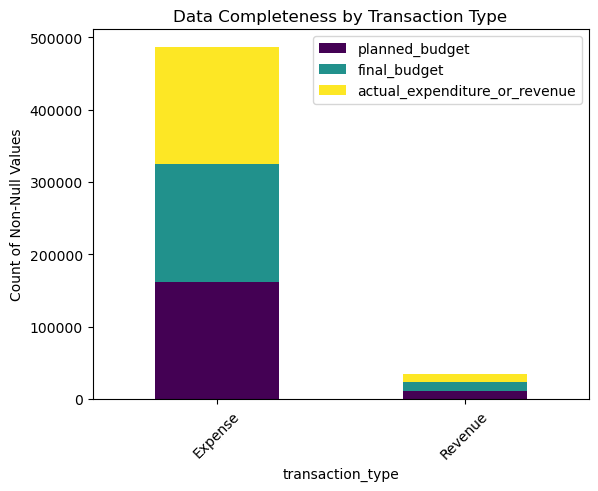

In [27]:
# Check missing values or anomalies by transaction type
inconsistencies = df.groupby('transaction_type').agg({'planned_budget': 'count', 'final_budget': 'count', 'actual_expenditure_or_revenue': 'count'})

# Visualization
plt.figure(figsize=(10, 6))
inconsistencies.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Data Completeness by Transaction Type")
plt.ylabel("Count of Non-Null Values")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

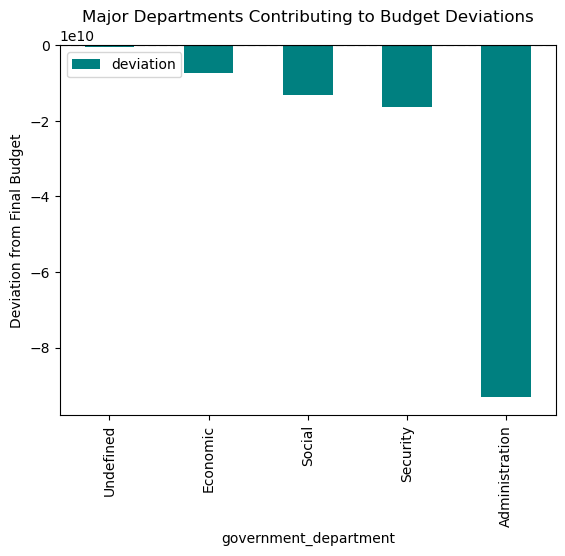

In [28]:
# Identify top deviations
df['deviation'] = df['actual_expenditure_or_revenue'] - df['final_budget']
top_deviations = df[['government_department', 'deviation']].groupby('government_department').sum().sort_values(by='deviation', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
top_deviations.plot(kind='bar', color='teal')
plt.title("Major Departments Contributing to Budget Deviations")
plt.ylabel("Deviation from Final Budget")
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.show()

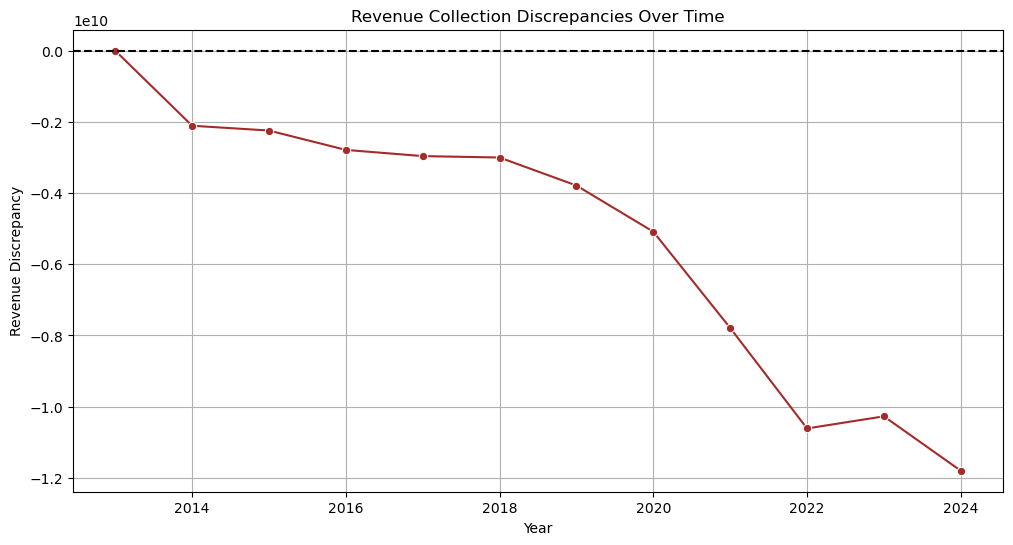

In [29]:
# Calculate revenue collection discrepancy
df['revenue_discrepancy'] = df['actual_expenditure_or_revenue'] - df['planned_budget']

# Aggregate over time
revenue_discrepancy_trend = df[df['transaction_type'] == 'Revenue'].groupby('year')['revenue_discrepancy'].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_discrepancy_trend, x='year', y='revenue_discrepancy', marker='o', color='brown')
plt.axhline(0, color='black', linestyle='--')
plt.title("Revenue Collection Discrepancies Over Time")
plt.xlabel("Year")
plt.ylabel("Revenue Discrepancy")
plt.grid(True)
plt.show()

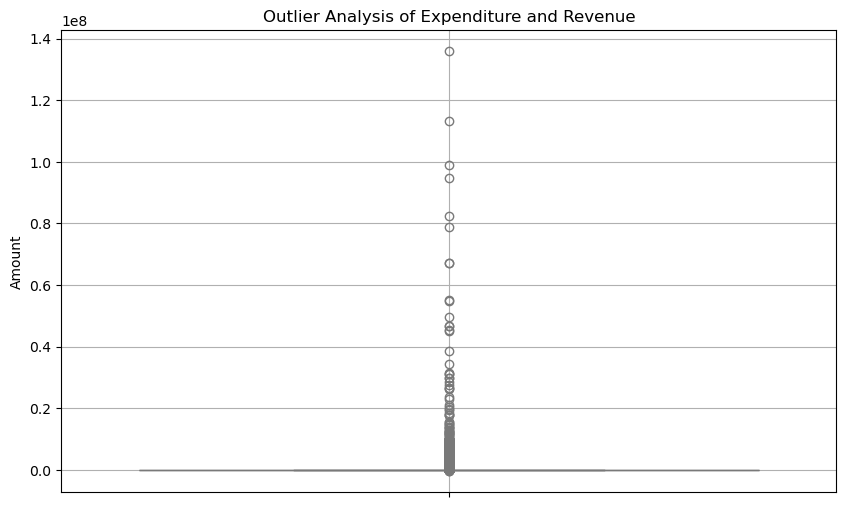

Number of Outliers: 58578


In [30]:
import numpy as np

# Identify outliers using IQR
Q1 = df['actual_expenditure_or_revenue'].quantile(0.25)
Q3 = df['actual_expenditure_or_revenue'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['actual_expenditure_or_revenue'] < (Q1 - 1.5 * IQR)) | (df['actual_expenditure_or_revenue'] > (Q3 + 1.5 * IQR))]

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='actual_expenditure_or_revenue', color='lightblue')
plt.title("Outlier Analysis of Expenditure and Revenue")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

print(f"Number of Outliers: {outliers.shape[0]}")

In [32]:
# # Ensure 'foreign_aid_percent_gdp' exists
# if 'foreign_aid_percent_gdp' in df.columns:
#     aid_revenue_corr = df.groupby('year')[['foreign_aid_percent_gdp', 'actual_expenditure_or_revenue']].mean().reset_index()

#     plt.figure(figsize=(12, 6))
#     sns.regplot(data=aid_revenue_corr, x='foreign_aid_percent_gdp', y='actual_expenditure_or_revenue', scatter_kws={'color':'red'}, line_kws={'color':'blue'})
    
#     plt.title("Correlation Between Foreign Aid and Fiscal Revenue")
#     plt.xlabel("Foreign Aid (% of GDP)")
#     plt.ylabel("Revenue/Expenditure")
#     plt.grid(True)
#     plt.show()

### **C. Predictive Analysis (What Will Happen?)**
1. What are the forecasted revenue trends under current economic conditions?
2. How will changes in GDP growth influence future expenditure?
3. What is the projected impact of inflation on fiscal deficits over the next 5 years?
4. Which predictive models best forecast cost overruns in specific departments?
5. How will varying levels of foreign aid affect domestic revenue performance?
6. What is the risk profile of revenue shortfalls under different economic scenarios?
7. How might seasonal trends influence future fiscal outcomes?
8. What role does funding_source diversification play in future projections?
9. How will planned_budget adjustments affect long-term expenditure trends?
10. What are the potential fiscal outcomes under high vs. low economic volatility scenarios?

c:\Users\maqbu\miniconda3\envs\minimal_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\maqbu\miniconda3\envs\minimal_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\maqbu\miniconda3\envs\minimal_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\maqbu\miniconda3\envs\minimal_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



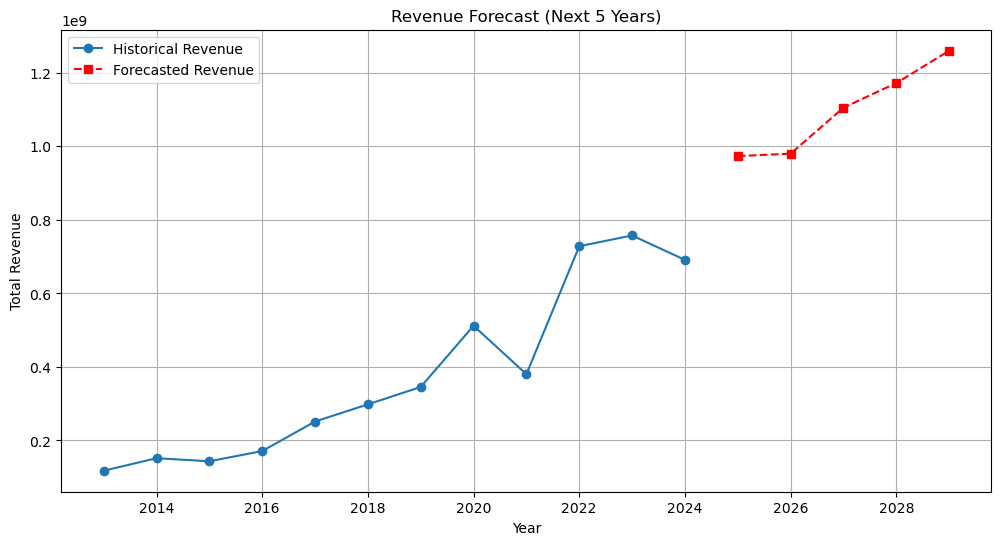

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Prepare time series data
revenue_df = df[df['transaction_type'] == 'Revenue'].groupby('year')['actual_expenditure_or_revenue'].sum()

# Fit ARIMA model
model = ARIMA(revenue_df, order=(2, 1, 2))  # (p, d, q) values tuned for forecasting
model_fit = model.fit()

# Forecast next 5 years
future_years = np.arange(revenue_df.index.max() + 1, revenue_df.index.max() + 6)
forecast = model_fit.forecast(steps=5)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(revenue_df, label="Historical Revenue", marker='o')
plt.plot(future_years, forecast, label="Forecasted Revenue", marker='s', linestyle="dashed", color='red')
plt.title("Revenue Forecast (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# from sklearn.linear_model import LinearRegression

# # Ensure GDP growth column exists
# if 'gdp_growth' in df.columns:
#     gdp_expenditure = df.groupby('year')[['gdp_growth', 'actual_expenditure_or_revenue']].mean().dropna()

#     # Fit regression model
#     X = gdp_expenditure[['gdp_growth']]
#     y = gdp_expenditure['actual_expenditure_or_revenue']
#     model = LinearRegression().fit(X, y)

#     # Predict future expenditure based on hypothetical GDP growth scenarios
#     future_gdp_growth = np.linspace(min(X.values), max(X.values), 5).reshape(-1, 1)
#     future_expenditure = model.predict(future_gdp_growth)

#     # Visualization
#     plt.figure(figsize=(12, 6))
#     sns.regplot(x=gdp_expenditure['gdp_growth'], y=gdp_expenditure['actual_expenditure_or_revenue'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
#     plt.title("Impact of GDP Growth on Government Expenditure")
#     plt.xlabel("GDP Growth (%)")
#     plt.ylabel("Projected Expenditure")
#     plt.grid(True)
#     plt.show()

In [37]:
# # Ensure inflation data exists
# if 'inflation_rate' in df.columns:
#     inflation_deficit = df.groupby('year')[['inflation_rate', 'actual_expenditure_or_revenue', 'planned_budget']].mean()
#     inflation_deficit['fiscal_deficit'] = inflation_deficit['actual_expenditure_or_revenue'] - inflation_deficit['planned_budget']

#     # Fit regression model
#     X = inflation_deficit[['inflation_rate']]
#     y = inflation_deficit['fiscal_deficit']
#     model = LinearRegression().fit(X, y)

#     # Predict future deficit based on inflation trends
#     future_inflation = np.linspace(min(X.values), max(X.values), 5).reshape(-1, 1)
#     future_deficit = model.predict(future_inflation)

#     # Visualization
#     plt.figure(figsize=(12, 6))
#     sns.regplot(x=inflation_deficit['inflation_rate'], y=inflation_deficit['fiscal_deficit'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
#     plt.title("Projected Impact of Inflation on Fiscal Deficit")
#     plt.xlabel("Inflation Rate (%)")
#     plt.ylabel("Fiscal Deficit")
#     plt.grid(True)
#     plt.show()

In [39]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error

# # Prepare dataset
# df['cost_overrun'] = df['actual_expenditure_or_revenue'] - df['final_budget']
# features = ['planned_budget', 'final_budget', 'gdp_growth', 'inflation_rate']
# df_clean = df.dropna(subset=features + ['cost_overrun'])

# X = df_clean[features]
# y = df_clean['cost_overrun']

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit Random Forest model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predict and evaluate
# predictions = model.predict(X_test)
# mae = mean_absolute_error(y_test, predictions)

# print(f"Random Forest Model MAE: {mae:.2f}")

# # Feature importance visualization
# importances = model.feature_importances_
# plt.figure(figsize=(10, 6))
# sns.barplot(x=importances, y=features)
# plt.title("Feature Importance in Predicting Cost Overruns")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.show()

In [41]:
# # Ensure foreign aid data exists
# if 'foreign_aid_percent_gdp' in df.columns:
#     aid_revenue = df.groupby('year')[['foreign_aid_percent_gdp', 'actual_expenditure_or_revenue']].mean()

#     # Fit regression model
#     X = aid_revenue[['foreign_aid_percent_gdp']]
#     y = aid_revenue['actual_expenditure_or_revenue']
#     model = LinearRegression().fit(X, y)

#     # Visualization
#     plt.figure(figsize=(12, 6))
#     sns.regplot(x=aid_revenue['foreign_aid_percent_gdp'], y=aid_revenue['actual_expenditure_or_revenue'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
#     plt.title("Impact of Foreign Aid on Domestic Revenue")
#     plt.xlabel("Foreign Aid (% of GDP)")
#     plt.ylabel("Domestic Revenue")
#     plt.grid(True)
#     plt.show()

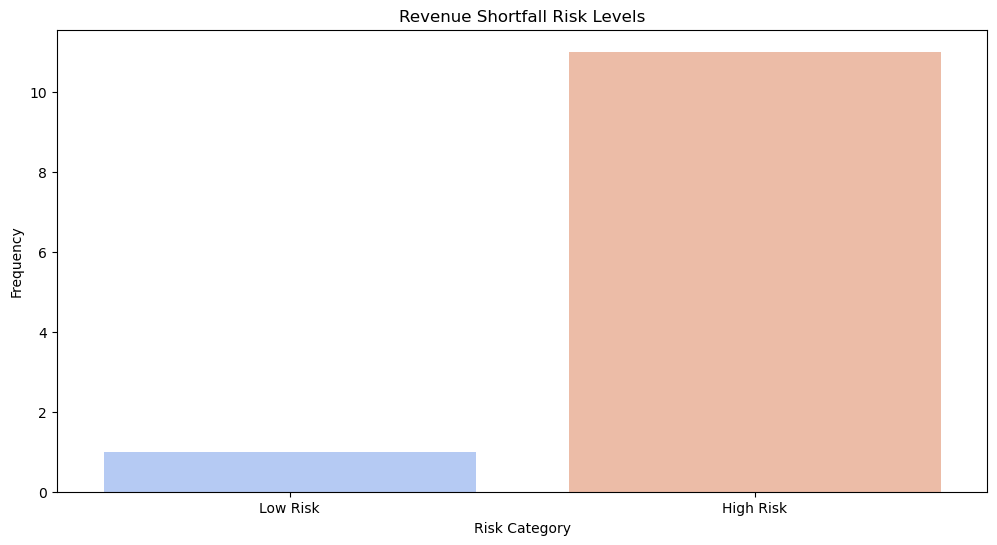

In [42]:
# Create revenue shortfall (Planned - Actual)
df['revenue_shortfall'] = df['planned_budget'] - df['actual_expenditure_or_revenue']

# Aggregate and categorize risk levels
risk_df = df.groupby('year')['revenue_shortfall'].sum()
risk_df = risk_df.apply(lambda x: "High Risk" if x > 1e9 else "Moderate Risk" if x > 5e8 else "Low Risk")

# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x=risk_df, palette='coolwarm')
plt.title("Revenue Shortfall Risk Levels")
plt.xlabel("Risk Category")
plt.ylabel("Frequency")
plt.show()

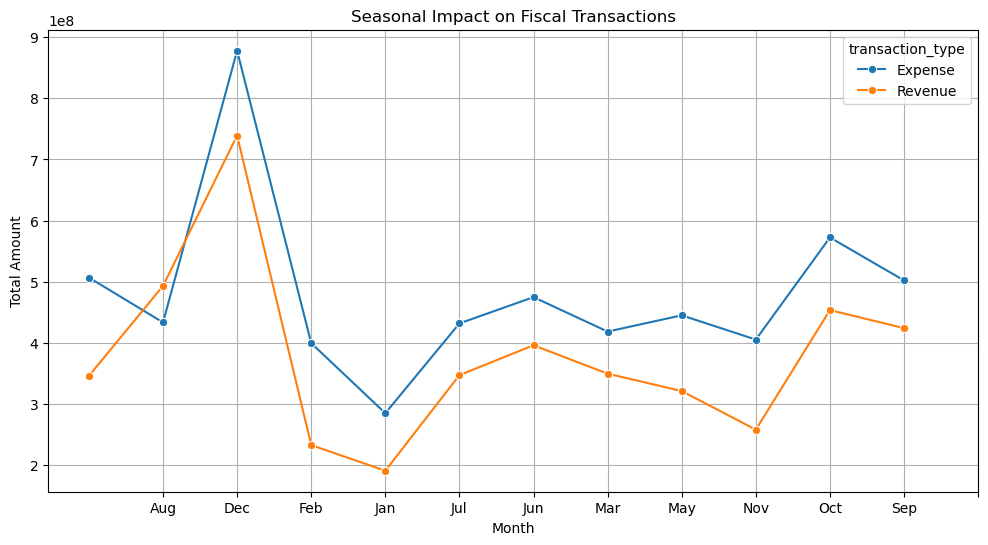

In [43]:
# Aggregate by month
seasonality_df = df.groupby(['month', 'transaction_type'])['actual_expenditure_or_revenue'].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonality_df, x='month', y='actual_expenditure_or_revenue', hue='transaction_type', marker='o')
plt.xticks(range(1, 13))
plt.title("Seasonal Impact on Fiscal Transactions")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

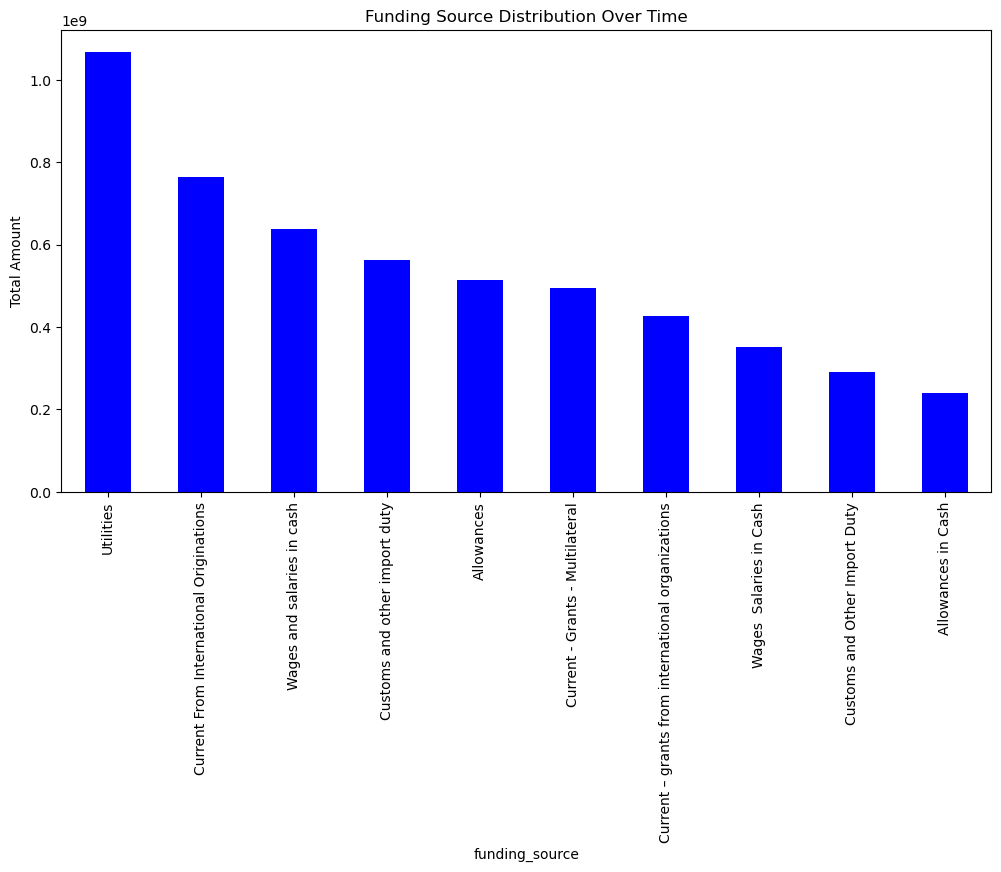

In [45]:
# Calculate dependency on funding sources
funding_distribution = df.groupby('funding_source')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
funding_distribution.plot(kind='bar', color='blue')
plt.title("Funding Source Distribution Over Time")
plt.ylabel("Total Amount")
plt.xticks(rotation=90)
plt.show()

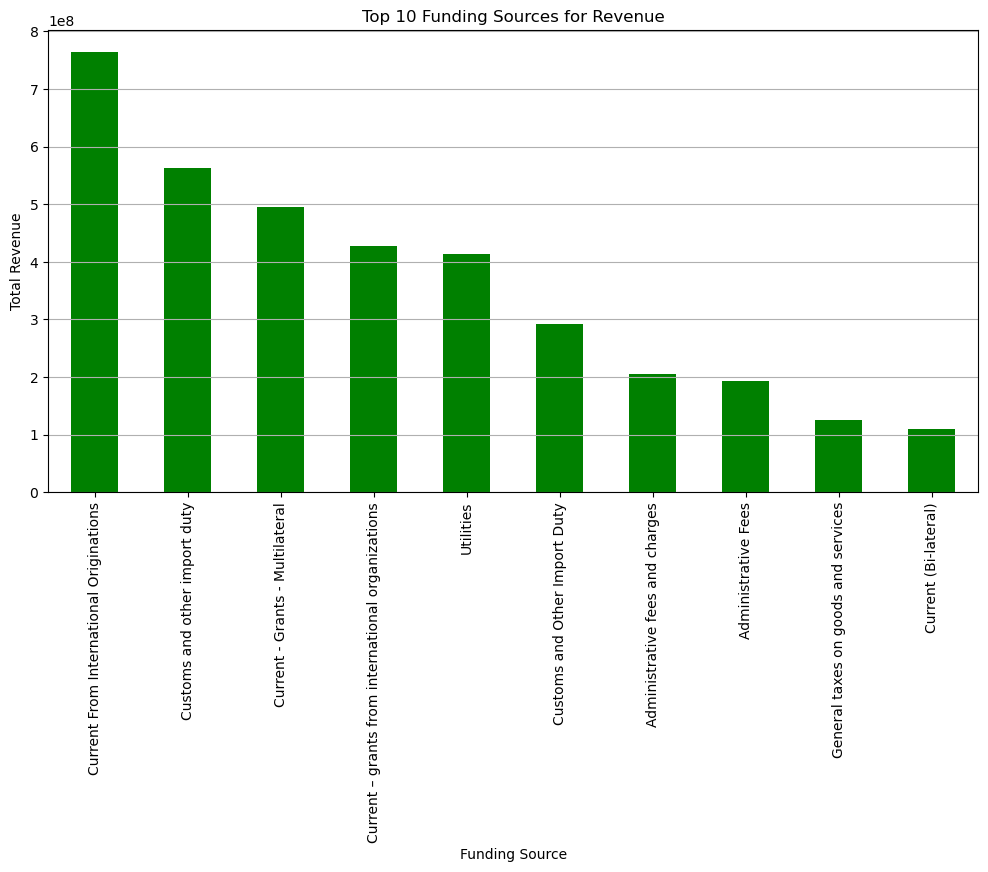

In [100]:
# Calculate funding distribution for Revenue
funding_revenue = df[df['transaction_type'] == 'Revenue'].groupby('funding_source')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
funding_revenue.plot(kind='bar', color='green')
plt.title("Top 10 Funding Sources for Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Funding Source")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


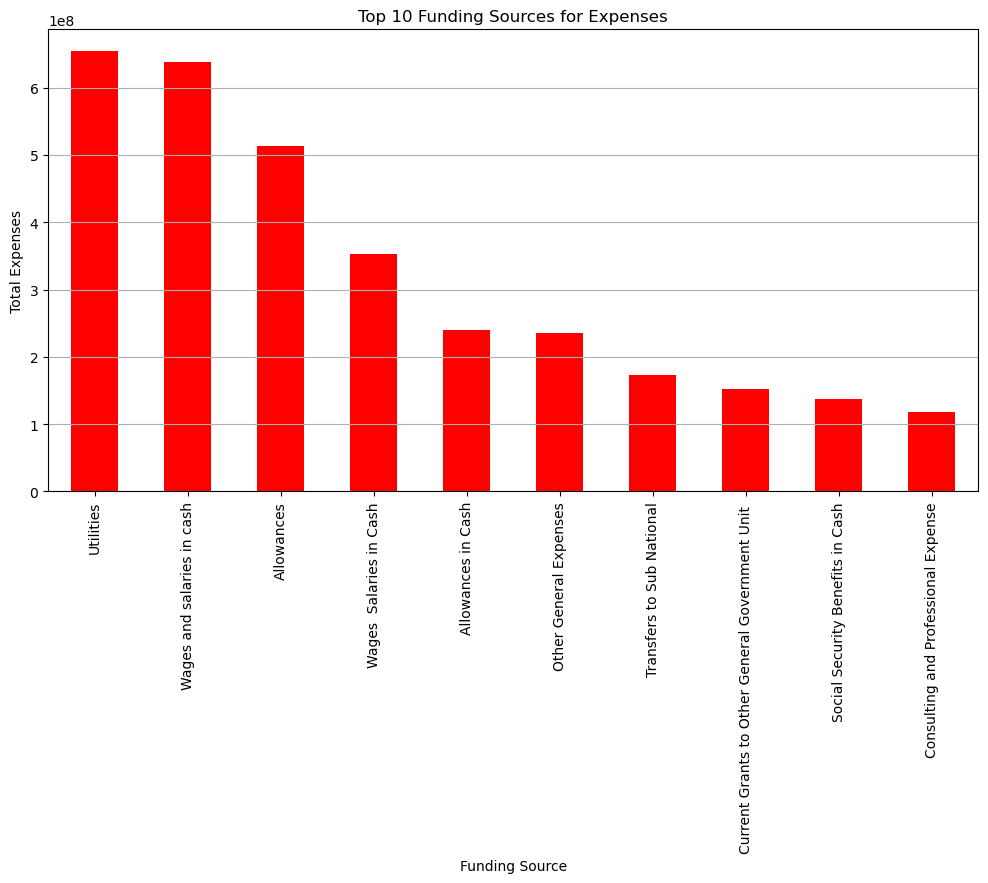

In [101]:
# Calculate funding distribution for Expenses
funding_expenses = df[df['transaction_type'] == 'Expense'].groupby('funding_source')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
funding_expenses.plot(kind='bar', color='red')
plt.title("Top 10 Funding Sources for Expenses")
plt.ylabel("Total Expenses")
plt.xlabel("Funding Source")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

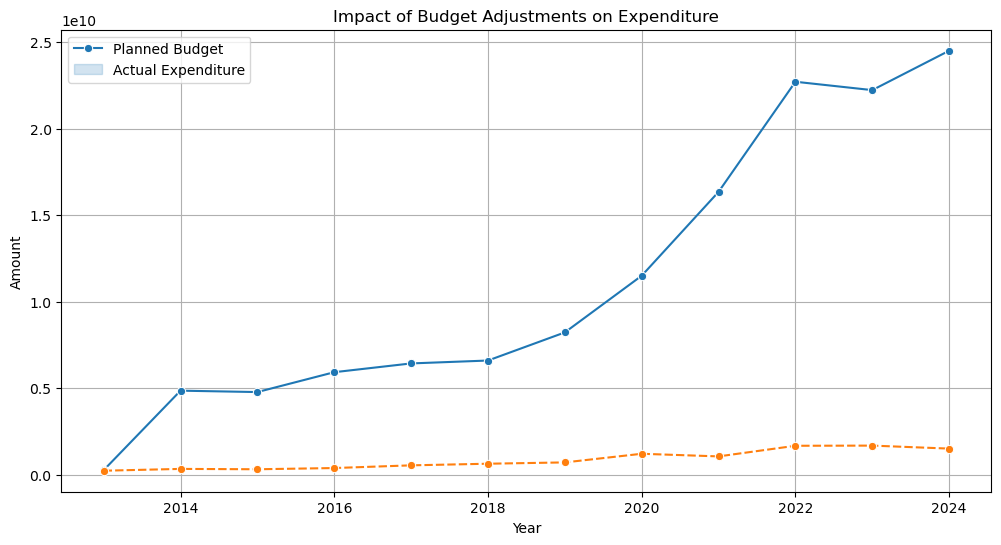

In [47]:
# Aggregate planned budget and actual expenditure over time
budget_trends = df.groupby('year')[['planned_budget', 'actual_expenditure_or_revenue']].sum()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_trends, marker="o")
plt.title("Impact of Budget Adjustments on Expenditure")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend(["Planned Budget", "Actual Expenditure"])
plt.grid(True)
plt.show()

In [48]:
# # Categorize economic volatility based on GDP growth variation
# if 'gdp_growth' in df.columns:
#     df['volatility'] = df['gdp_growth'].rolling(3).std()  # Moving standard deviation of GDP growth

#     # Aggregate fiscal outcomes under high and low volatility
#     volatility_threshold = df['volatility'].quantile(0.75)
#     df['volatility_category'] = df['volatility'].apply(lambda x: "High Volatility" if x >= volatility_threshold else "Low Volatility")

#     fiscal_impact = df.groupby('volatility_category')['actual_expenditure_or_revenue'].mean()

#     # Visualization
#     plt.figure(figsize=(10, 6))
#     fiscal_impact.plot(kind='bar', color=['red', 'green'])
#     plt.title("Fiscal Performance Under Different Economic Volatility Levels")
#     plt.ylabel("Average Expenditure/Revenue")
#     plt.xticks(rotation=0)
#     plt.show()

### **D. Prescriptive Analysis (What Should Be Done?)**
1. What revenue optimization strategies can increase collection efficiency?
2. Which cost reduction measures yield the highest ROI?
3. How can budget reallocation mitigate recurring overspending?
4. What are the best practices in fiscal management from peer countries?
5. How can technology be leveraged to improve real-time financial reporting?
6. What risk-mitigation strategies should be prioritized to address revenue leakage?
7. How can operational inefficiencies be minimized through process reengineering?
8. What role can public-private partnerships play in improving financial performance?
9. Which policy interventions are most likely to reduce fiscal deficits?
10. How should funding_source re-prioritization be structured for optimal results?

In [102]:
# Identify revenue gaps by department
revenue_gaps = df[df['transaction_type'] == 'Revenue'].groupby('government_department')['planned_budget', 'actual_expenditure_or_revenue'].sum()
revenue_gaps['collection_efficiency'] = revenue_gaps['actual_expenditure_or_revenue'] / revenue_gaps['planned_budget']

# Visualization
plt.figure(figsize=(12, 6))
revenue_gaps['collection_efficiency'].sort_values().plot(kind='bar', color='blue')
plt.title("Revenue Collection Efficiency by Department")
plt.ylabel("Collection Efficiency (%)")
plt.xticks(rotation=90)
plt.show()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

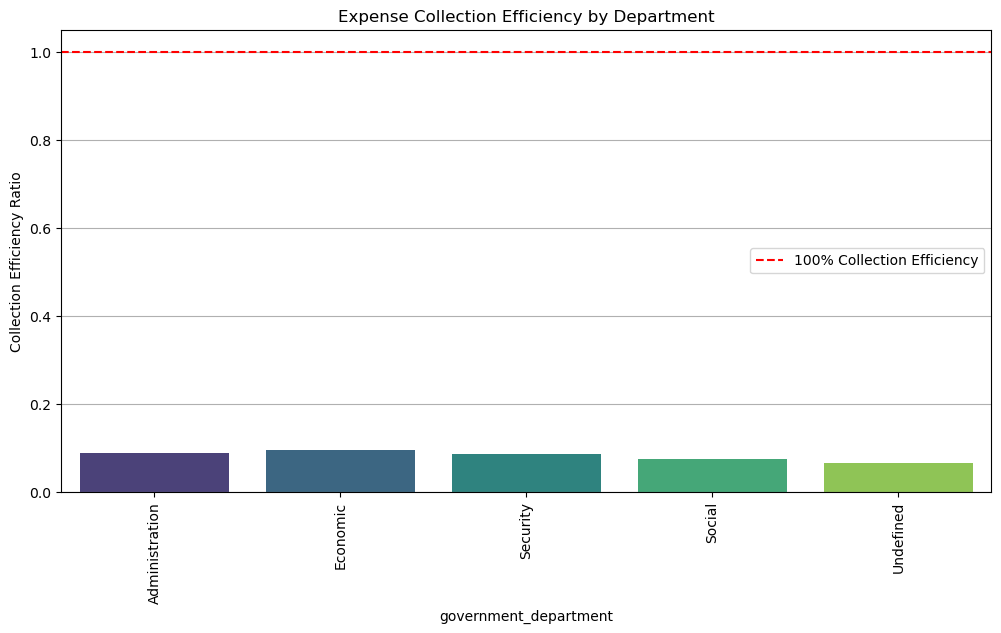

In [107]:
# Identify revenue gaps by department
revenue_gaps = df[df['transaction_type'] == 'Expense'].groupby('government_department')[['planned_budget', 'actual_expenditure_or_revenue']].sum()

# Calculate collection efficiency
revenue_gaps['collection_efficiency'] = revenue_gaps['actual_expenditure_or_revenue'] / revenue_gaps['planned_budget']

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_gaps.index, y=revenue_gaps['collection_efficiency'], palette="viridis")
plt.axhline(1, color='red', linestyle='--', label="100% Collection Efficiency")
plt.xticks(rotation=90)
plt.ylabel("Collection Efficiency Ratio")
plt.title("Expense Collection Efficiency by Department")
plt.legend()
plt.grid(axis='y')
plt.show()

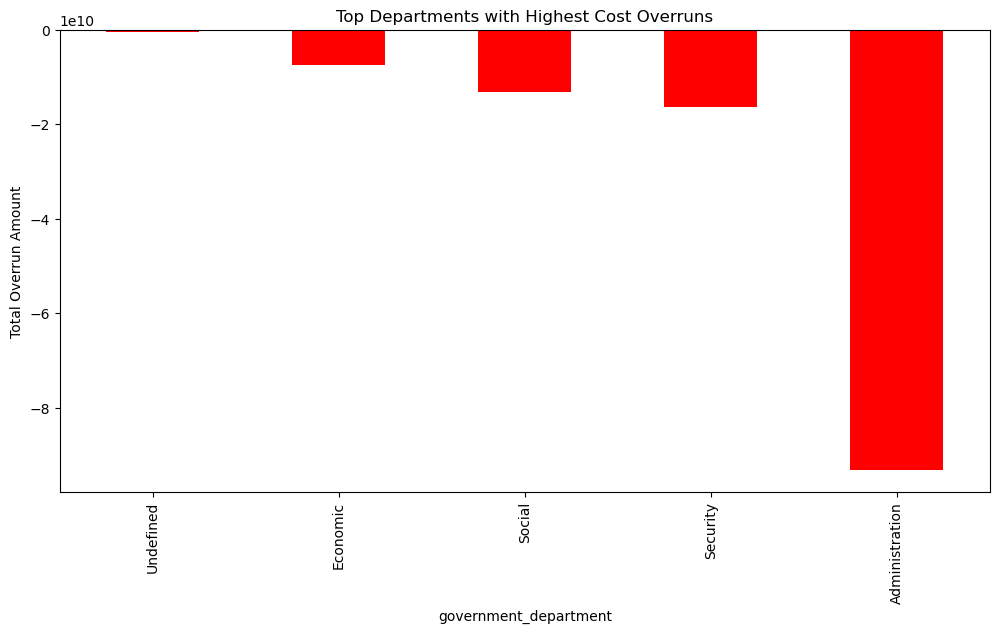

In [50]:
# Identify departments with the highest cost overruns
df['cost_overrun'] = df['actual_expenditure_or_revenue'] - df['final_budget']
high_overruns = df.groupby('government_department')['cost_overrun'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
high_overruns[:10].plot(kind='bar', color='red')
plt.title("Top Departments with Highest Cost Overruns")
plt.ylabel("Total Overrun Amount")
plt.xticks(rotation=90)
plt.show()

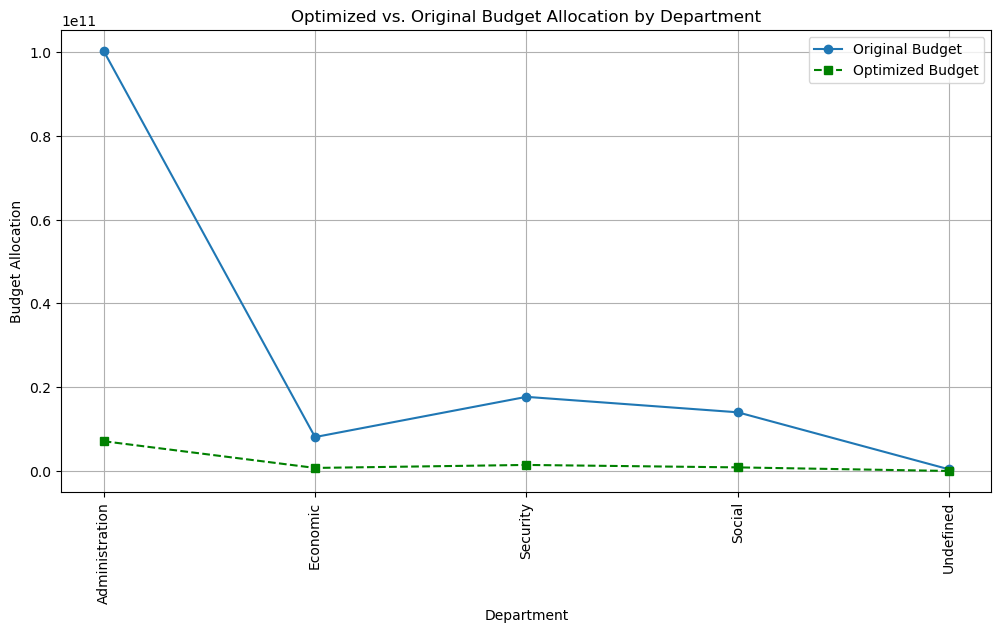

In [108]:
# Aggregate data at the department level
dept_budget = df.groupby("government_department")[["planned_budget", "final_budget", "actual_expenditure_or_revenue"]].sum().reset_index()

# Define the objective function (minimizing cost overruns)
def objective(x):
    return np.sum((dept_budget["actual_expenditure_or_revenue"] - x) ** 2)

# Constraints: The optimized budget must not exceed the planned budget
constraints = [{"type": "ineq", "fun": lambda x: dept_budget["planned_budget"] - x}]

# Initial guess: Use final_budget as the starting point
x0 = dept_budget["final_budget"].values

# Run optimization with fewer variables
result = opt.minimize(objective, x0, constraints=constraints, method="SLSQP")

# Assign optimized budgets back to dataframe
dept_budget["optimized_budget"] = result.x

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(dept_budget["government_department"], dept_budget["final_budget"], label="Original Budget", marker="o")
plt.plot(dept_budget["government_department"], dept_budget["optimized_budget"], label="Optimized Budget", marker="s", linestyle="dashed", color="green")
plt.xticks(rotation=90)
plt.title("Optimized vs. Original Budget Allocation by Department")
plt.xlabel("Department")
plt.ylabel("Budget Allocation")
plt.legend()
plt.grid(True)
plt.show()

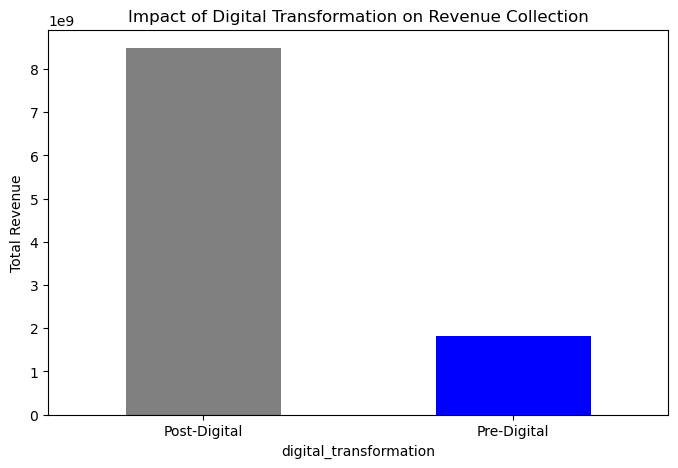

In [52]:
# Compare revenue collection before and after digital implementation (hypothetical example)
df['digital_transformation'] = df['year'].apply(lambda x: 'Post-Digital' if x >= 2018 else 'Pre-Digital')
digital_impact = df.groupby('digital_transformation')['actual_expenditure_or_revenue'].sum()

# Visualization
plt.figure(figsize=(8, 5))
digital_impact.plot(kind='bar', color=['gray', 'blue'])
plt.title("Impact of Digital Transformation on Revenue Collection")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

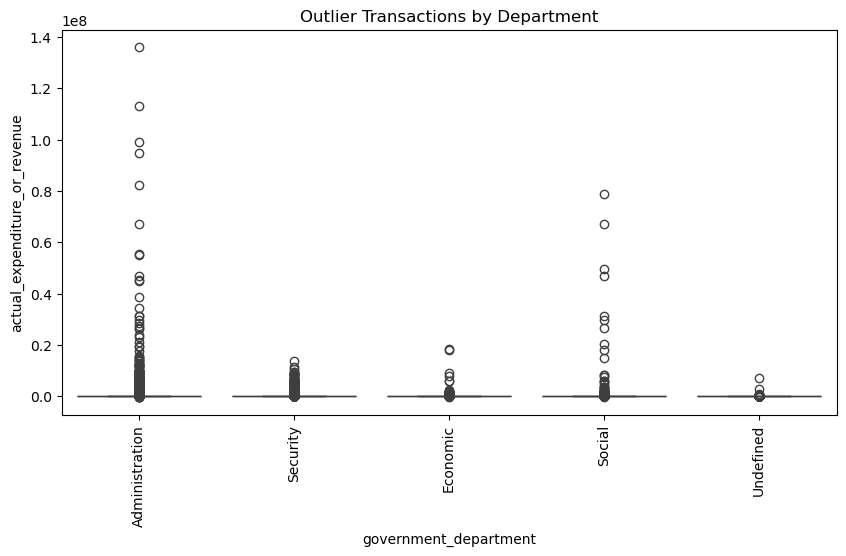

In [53]:
# Identify outlier transactions (potential fraud)
Q1 = df['actual_expenditure_or_revenue'].quantile(0.25)
Q3 = df['actual_expenditure_or_revenue'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['actual_expenditure_or_revenue'] < Q1 - 1.5 * IQR) | (df['actual_expenditure_or_revenue'] > Q3 + 1.5 * IQR)]

# Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='government_department', y='actual_expenditure_or_revenue')
plt.xticks(rotation=90)
plt.title("Outlier Transactions by Department")
plt.show()

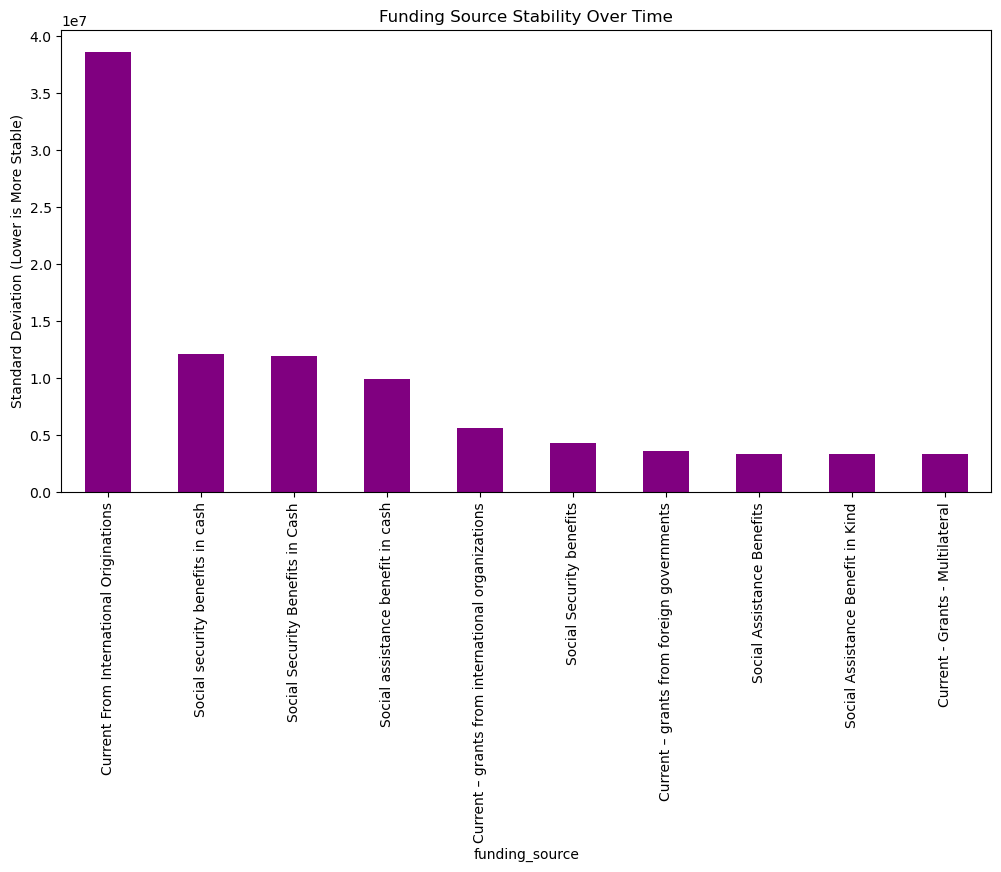

In [59]:
# Calculate funding stability over time
funding_stability = df.groupby('funding_source')['actual_expenditure_or_revenue'].std().sort_values(ascending=False)
funding_stability = funding_stability.head(10)

# Visualization
plt.figure(figsize=(12, 6))
funding_stability.plot(kind='bar', color='purple')
plt.title("Funding Source Stability Over Time")
plt.ylabel("Standard Deviation (Lower is More Stable)")
plt.xticks(rotation=90)
plt.show()

### **E. Benchmarking (How Do We Compare?)**
1. How do key fiscal metrics compare against 3-5 peer economies?
2. What industry KPIs are most indicative of revenue efficiency?
3. How do government_departments rank against national fiscal benchmarks?
4. What benchmarks exist for cost overruns in the public sector?
5. How does the tax revenue_percent_gdp compare with international norms?
6. What standards are used in external audits of fiscal performance?
7. How do final_budget and actual_expenditure align with best practices?
8. What is the comparative performance of funding_source allocation in similar jurisdictions?
9. How do economic indicators (GDP, inflation) in this dataset align with global trends?
10. What benchmarking models can be used to measure fiscal sustainability?

In [63]:
# # Example KPI calculation (replace with real data)
# df['revenue_per_capita'] = df['actual_expenditure_or_revenue'] / df['population']

# # Visualization
# sns.histplot(df['revenue_per_capita'], bins=20, kde=True)
# plt.title("Revenue Per Capita Distribution")
# plt.xlabel("Revenue Per Capita")
# plt.show()

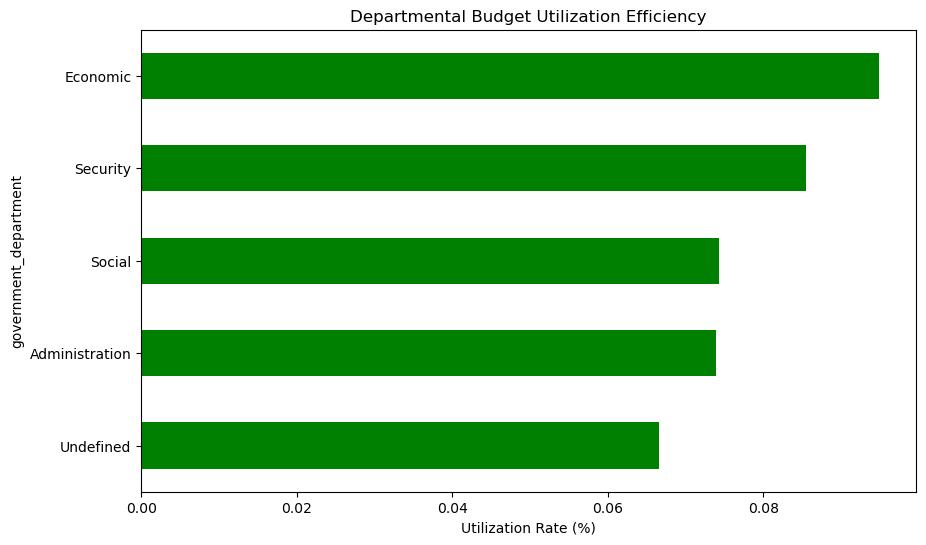

In [62]:
# Rank departments by budget utilization
department_ranking = df.groupby('government_department')[['planned_budget', 'actual_expenditure_or_revenue']].sum()
department_ranking['utilization_rate'] = department_ranking['actual_expenditure_or_revenue'] / department_ranking['planned_budget']

# Visualization
department_ranking['utilization_rate'].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.title("Departmental Budget Utilization Efficiency")
plt.xlabel("Utilization Rate (%)")
plt.show()

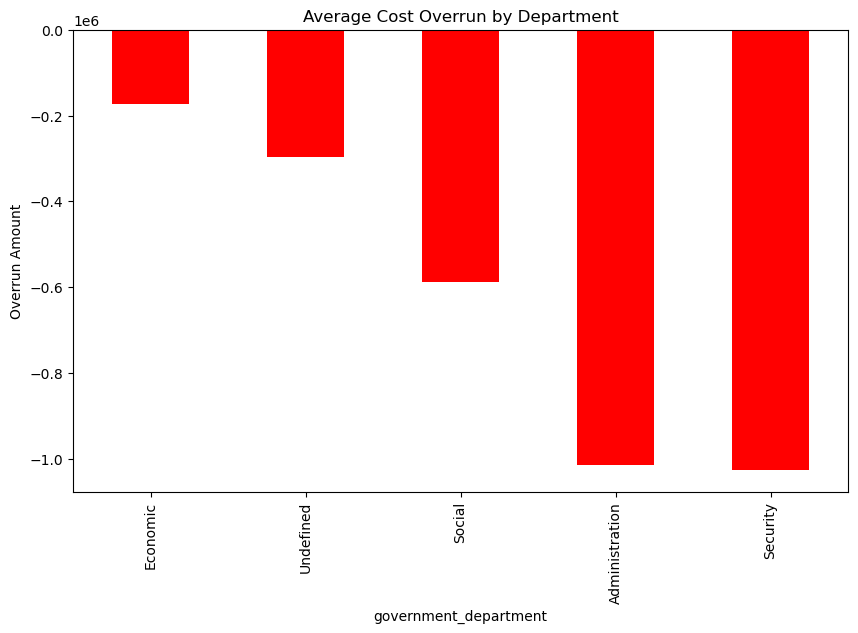

In [64]:
# Calculate cost overruns
df['cost_overrun'] = df['actual_expenditure_or_revenue'] - df['final_budget']
cost_overrun_benchmark = df.groupby('government_department')['cost_overrun'].mean()

# Visualization
cost_overrun_benchmark.sort_values(ascending=False).plot(kind='bar', color='red', figsize=(10, 6))
plt.title("Average Cost Overrun by Department")
plt.ylabel("Overrun Amount")
plt.xticks(rotation=90)
plt.show()

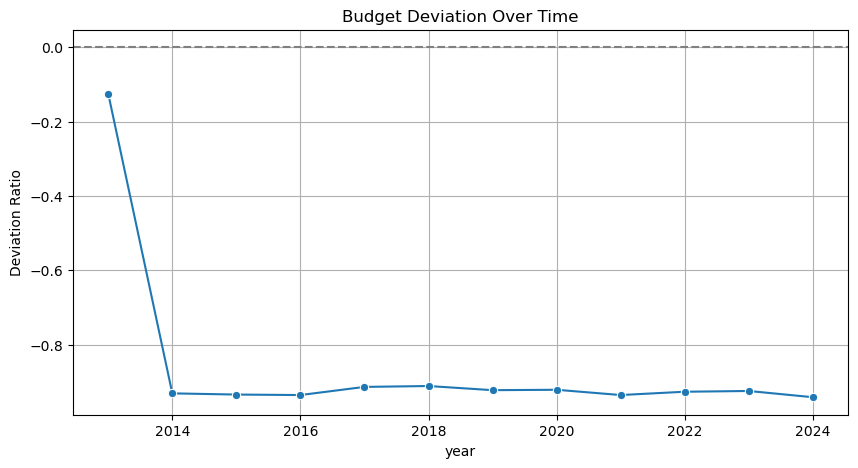

In [66]:
# Compare budget adherence levels
budget_deviation = df.groupby('year')[['final_budget', 'actual_expenditure_or_revenue']].sum()
budget_deviation['deviation_ratio'] = (budget_deviation['actual_expenditure_or_revenue'] - budget_deviation['final_budget']) / budget_deviation['final_budget']

# Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(data=budget_deviation['deviation_ratio'], marker="o")
plt.axhline(0, color='gray', linestyle='dashed')
plt.title("Budget Deviation Over Time")
plt.ylabel("Deviation Ratio")
plt.grid(True)
plt.show()

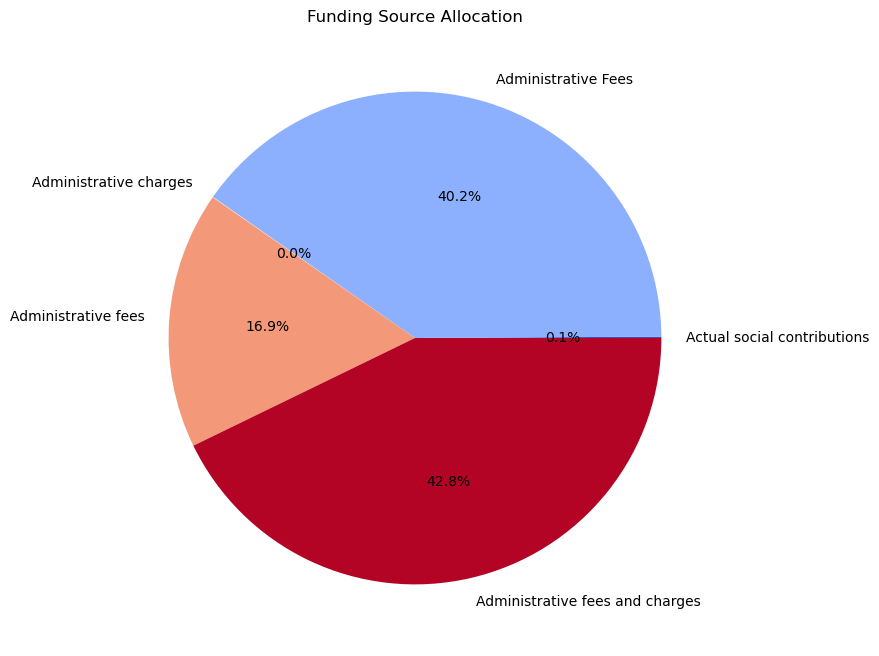

In [72]:
# Funding source breakdown
funding_distribution = df.groupby('funding_source')['actual_expenditure_or_revenue'].sum().head()

# Visualization
funding_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colormap='coolwarm')
plt.title("Funding Source Allocation")
plt.ylabel("")
plt.show()

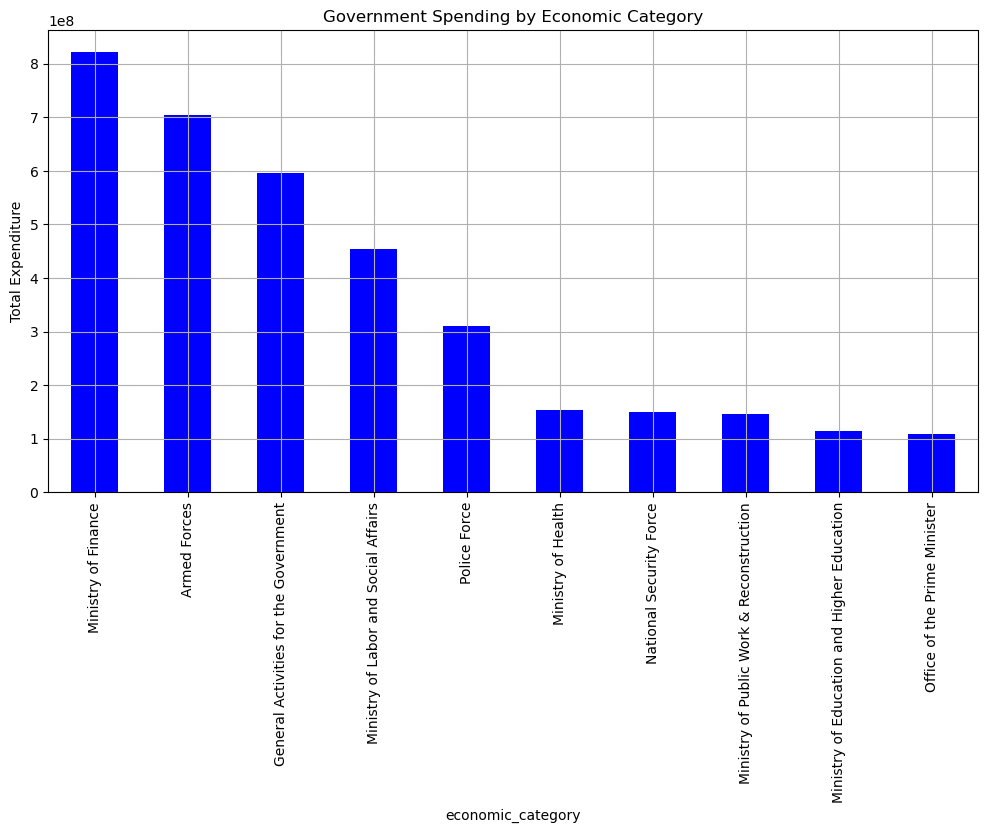

In [76]:
# Aggregate total expenditure by economic category
spending_by_category = df[df['transaction_type'] == 'Expense'].groupby('economic_category')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
spending_by_category.plot(kind='bar', color='blue')
plt.title("Government Spending by Economic Category")
plt.ylabel("Total Expenditure")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

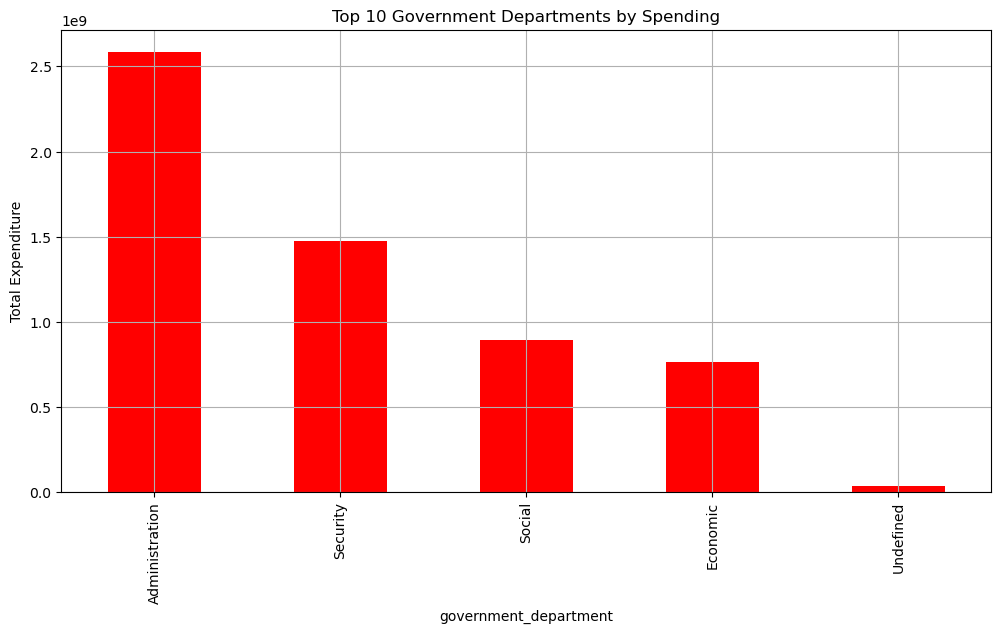

In [77]:
# Aggregate total expenditure by department
spending_by_department = df[df['transaction_type'] == 'Expense'].groupby('government_department')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
spending_by_department.head(10).plot(kind='bar', color='red')
plt.title("Top 10 Government Departments by Spending")
plt.ylabel("Total Expenditure")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

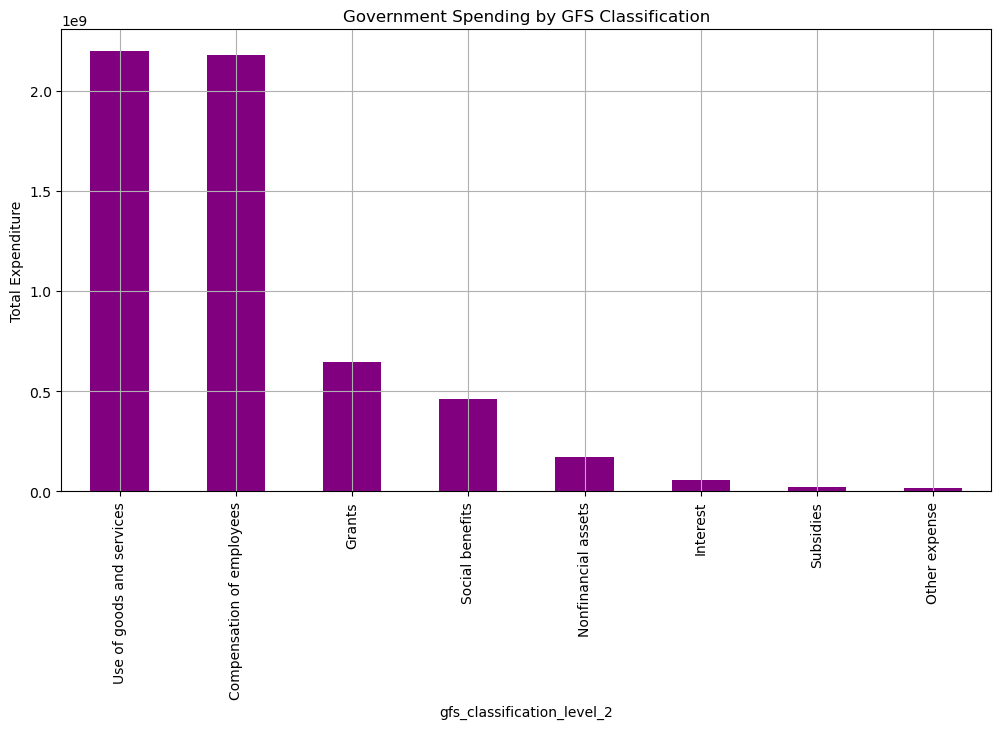

In [78]:
# Aggregate expenditure by GFS classification (Level 2)
spending_by_gfs = df[df['transaction_type'] == 'Expense'].groupby('gfs_classification_level_2')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
spending_by_gfs.head(10).plot(kind='bar', color='purple')
plt.title("Government Spending by GFS Classification")
plt.ylabel("Total Expenditure")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

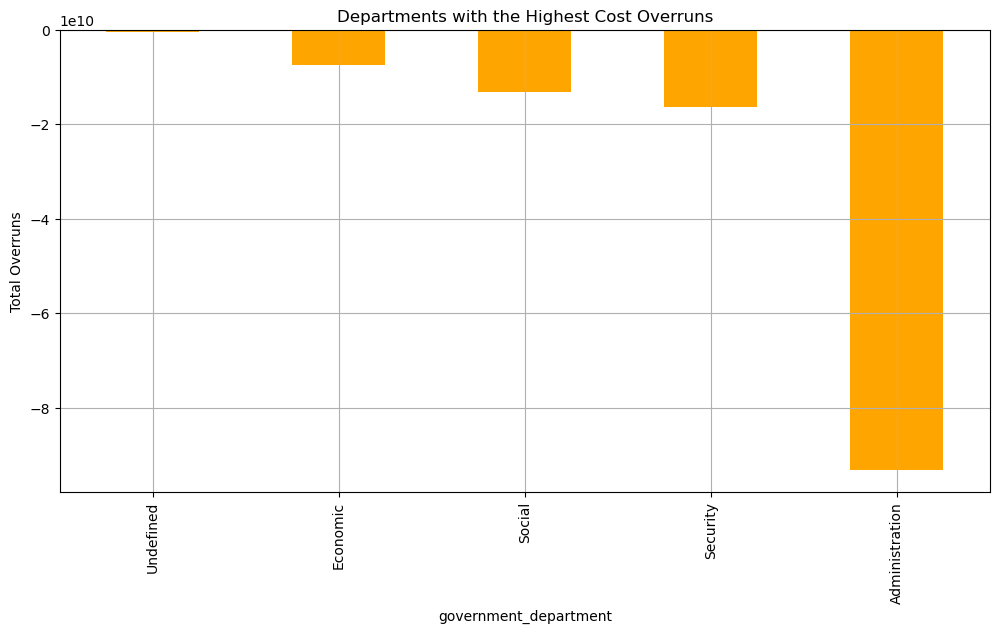

In [79]:
# Calculate cost overruns
df['cost_overrun'] = df['actual_expenditure_or_revenue'] - df['final_budget']

# Identify departments with highest cost overruns
high_overrun_departments = df.groupby('government_department')['cost_overrun'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
high_overrun_departments.head(10).plot(kind='bar', color='orange')
plt.title("Departments with the Highest Cost Overruns")
plt.ylabel("Total Overruns")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

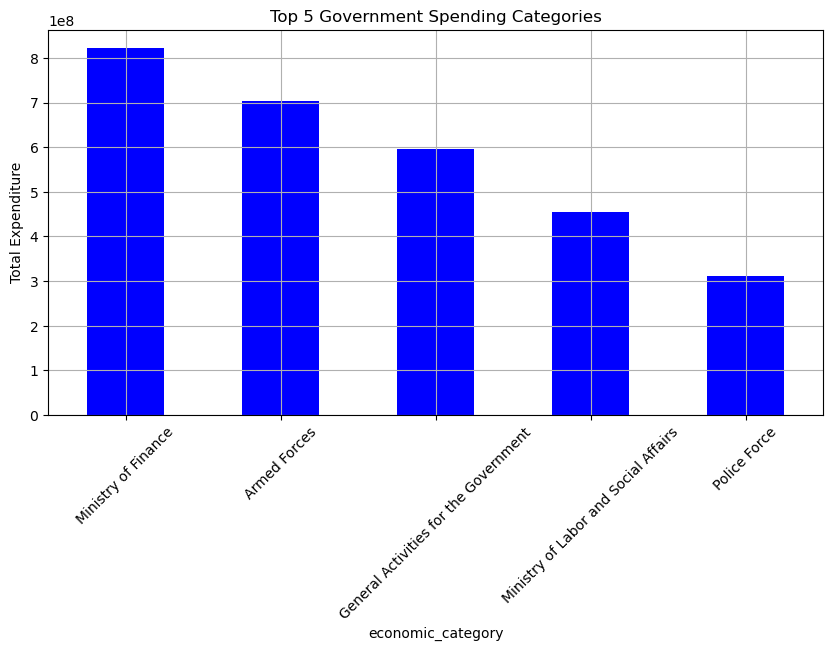

In [82]:
top_projects = df[df['transaction_type'] == 'Expense'].groupby('economic_category')['actual_expenditure_or_revenue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
top_projects.plot(kind='bar', color='blue')
plt.title("Top 5 Government Spending Categories")
plt.ylabel("Total Expenditure")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

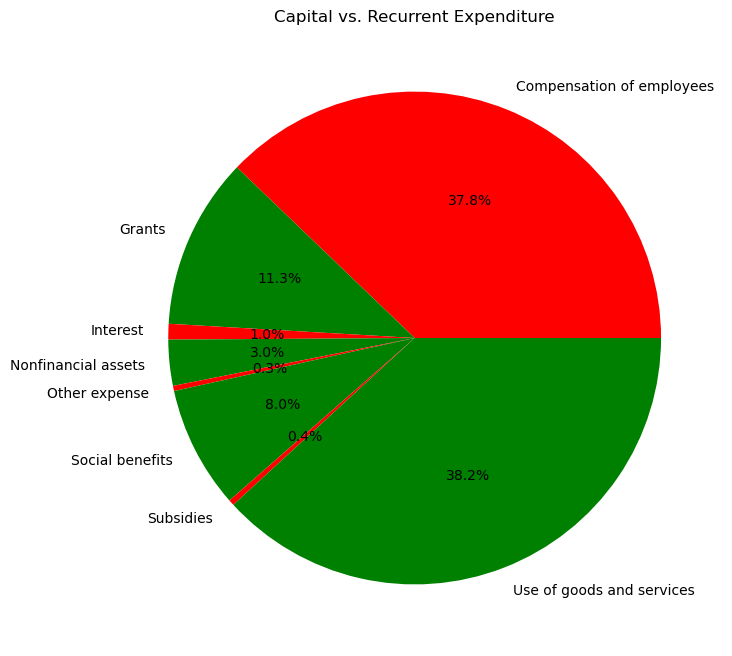

In [84]:
spending_by_type = df[df['transaction_type'] == 'Expense'].groupby('gfs_classification_level_2')['actual_expenditure_or_revenue'].sum()

plt.figure(figsize=(8, 8))
spending_by_type.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title("Capital vs. Recurrent Expenditure")
plt.ylabel("")
plt.show()

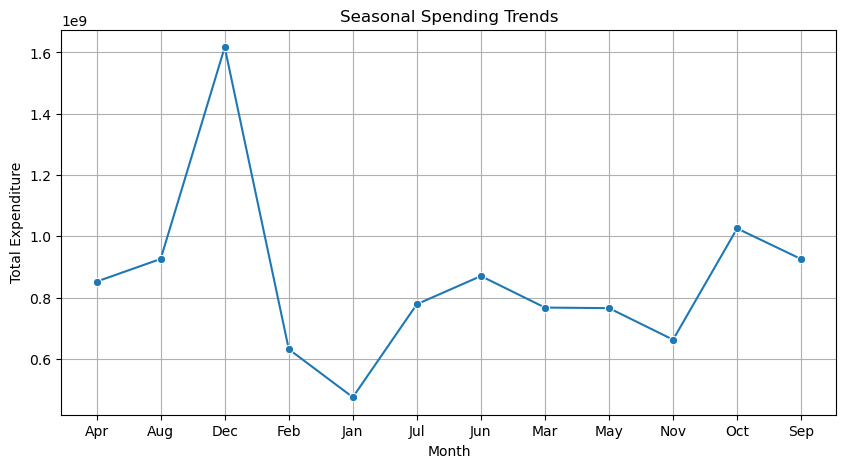

In [111]:
# df['month'] = df['fiscal_date'].dt.month
monthly_trend = df.groupby('month')['actual_expenditure_or_revenue'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o')
plt.title("Seasonal Spending Trends")
plt.xlabel("Month")
plt.ylabel("Total Expenditure")
plt.grid(True)
plt.show()

In [113]:
# debt_expenditure = df[df['economic_category'] == 'Debt Servicing'].groupby('year')['actual_expenditure_or_revenue'].sum()
# total_expenditure = df.groupby('year')['actual_expenditure_or_revenue'].sum()

# plt.figure(figsize=(10, 5))
# plt.plot(debt_expenditure.index, debt_expenditure / total_expenditure, marker='o', label="Debt Servicing % of Total Expenditure")
# plt.title("Debt Servicing as % of Total Expenditure")
# plt.ylabel("Percentage")
# plt.grid(True)
# plt.legend()
# plt.show()

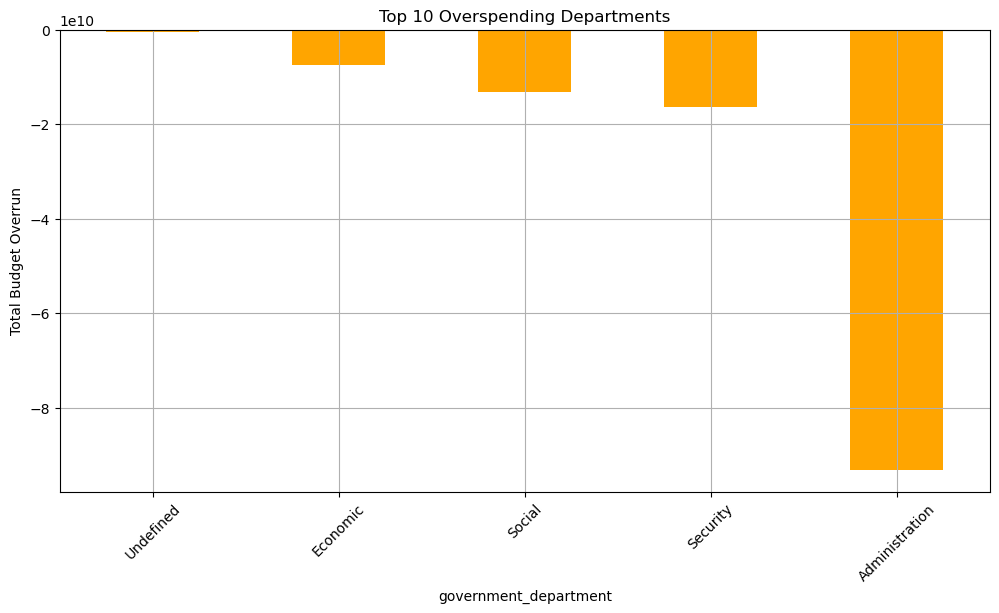

In [87]:
df['budget_variance'] = df['actual_expenditure_or_revenue'] - df['final_budget']
overspending_depts = df.groupby('government_department')['budget_variance'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
overspending_depts.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Overspending Departments")
plt.ylabel("Total Budget Overrun")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [94]:
# economic_factors = df[['actual_expenditure_or_revenue', 'gdp_growth', 'inflation_rate', 'unemployment_rate']].corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(economic_factors, annot=True, cmap="coolwarm")
# plt.title("Correlation Between Economic Factors and Spending")
# plt.show()

c:\Users\maqbu\miniconda3\envs\minimal_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\maqbu\miniconda3\envs\minimal_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\maqbu\miniconda3\envs\minimal_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\maqbu\miniconda3\envs\minimal_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given wit

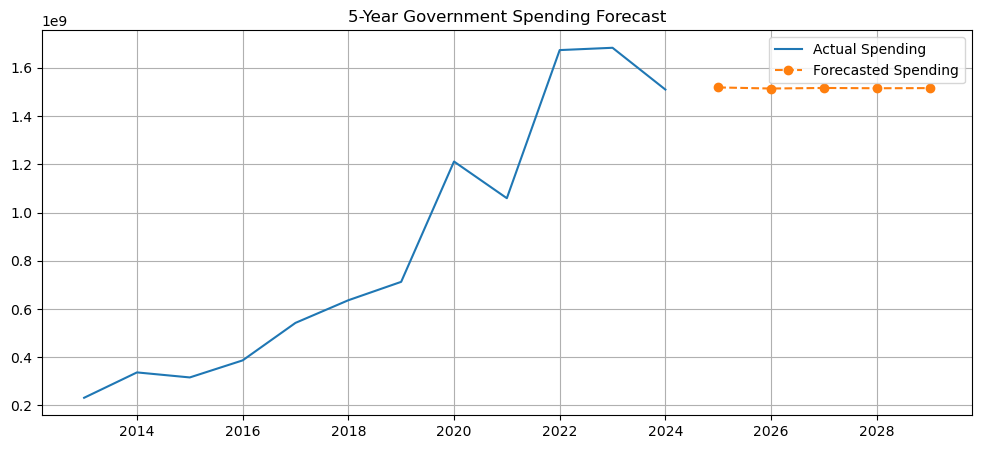

In [89]:
fiscal_series = df.groupby('year')['actual_expenditure_or_revenue'].sum()

model = ARIMA(fiscal_series, order=(1, 1, 1))
fit_model = model.fit()

forecast = fit_model.forecast(steps=5)
forecast.index = range(fiscal_series.index.max() + 1, fiscal_series.index.max() + 6)

plt.figure(figsize=(12, 5))
plt.plot(fiscal_series, label="Actual Spending")
plt.plot(forecast, label="Forecasted Spending", linestyle="dashed", marker='o')
plt.title("5-Year Government Spending Forecast")
plt.legend()
plt.grid(True)
plt.show()